In [1]:
# Library importation
import pandas as pd
import numpy as np
import re

# Figures
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
sns.set()

# Dataframe column views
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Stats
from scipy.stats import chi2_contingency
import scipy.stats as st

# Impact encoding
from category_encoders import TargetEncoder

# ML
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder


In [2]:
%matplotlib inline

In [3]:
# Import of cleaning functions
from cleaning59 import na_rows_list, na_raw_drop_df, min_row_data_rate_list, min_row_data_rate_df, column_data_rate, column_data_rate_mean, columns_not_in_list, columns_delete_df, min_column_data_rate_df, low_outlier_filter_df, high_outlier_filter_df, dic_high_outlier_filter_df, word_column_filter_df, word_column_filter_lst, sign_invert_filter_df 

In [4]:
# Import of graph functions
from plotting03 import bi_joint_plot

In [5]:
# Import of feature engineering functions
from ML20 import OneHotEncoder, label_encoding_transform_with_merge, target_encoding_transform_with_merge, vector_encoding_transform_with_merge, encoding_transform_with_merge

# DATA READING

## Dataset 2015

In [6]:
# Loading & reading
data_seattle_2015 = pd.read_csv('projets\\04_seattle_building_energy\\2015_building_energy_benchmarking.csv',sep=',',dtype='object')

print(data_seattle_2015.head())

  OSEBuildingID DataYear          BuildingType        PrimaryPropertyType  \
0         21548     2015  Multifamily LR (1-4)       Low-Rise Multifamily   
1         26379     2015        NonResidential                      Hotel   
2         26713     2015  Multifamily HR (10+)      High-Rise Multifamily   
3           102     2015        NonResidential                      Hotel   
4           503     2015        NonResidential  Supermarket/Grocery Store   

             PropertyName TaxParcelIdentificationNumber  \
0        PUGET VISTA APTS                    1992200030   
1         GEORGETOWN  INN                    6920700025   
2          QUINTESSA APTS                    5247800955   
3  MARRIOTT RESIDENCE INN                    1984200065   
4        RESTAURANT DEPOT                    1824049003   

                                            Location CouncilDistrictCode  \
0  411 W REPUBLICAN ST\nSEATTLE, WA 98119\n(47.62...                   7   
1  6100 CORSON AVE S\nSEATTLE,

## Dataset 2016

In [7]:
# Loading & reading
data_seattle_2016 = pd.read_csv('projets\\04_seattle_building_energy\\2016_building_energy_benchmarking.csv',sep=',',dtype='object')

data_seattle_2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101,0659000030,7,DOWNTOWN,47.6122,-122.33799,1927,1,12,88434,0,88434,Hotel,Hotel,88434,NaN,NaN,NaN,NaN,NaN,60,81.69999695,84.30000305,182.5,189,7226362.5,7456910,2003882,1156514.25,3946027,12764.5293,1276453,false,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880,Parking,15064,Restaurant,4622,NaN,61,94.80000305,97.90000153,176.1000061,179.3999939,8387933,8664479,0,950425.1875,3242851,51450.81641,5145082,false,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101,0659000475,7,DOWNTOWN,47.61393,-122.3381,1969,1,41,956110,196718,759392,Hotel,Hotel,756493,NaN,NaN,NaN,NaN,NaN,43,96,97.69999695,241.8999939,244.1000061,72587024,73937112,21566554,14515435,49526664,14938,1493800,false,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1,10,61320,0,61320,Hotel,Hotel,61320,NaN,NaN,NaN,NaN,NaN,56,110.8000031,113.3000031,216.1999969,224,6794584,6946800.5,2214446.25,811525.3125,2768924,18112.13086,1811213,false,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445,Parking,68009,Swimming Pool,0,NaN,75,114.8000031,118.6999969,211.3999939,215.6000061,14172606,14656503,0,1573448.625,5368607,88039.98438,8803998,false,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1,1,12294,0,12294,Office,Office,12294,NaN,NaN,NaN,NaN,NaN,46,69.09999847,76.69999695,161.6999969,176.1000061,849745.6875,943003.1875,0,153655,524270.86,3254.750244,325475.0244,true,NaN,Error - Correct Default Data,NaN,20.94,1.7
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1,1,16000,0,16000,Other - Recreation,Other - Recreation,16000,NaN,NaN,NaN,NaN,NaN,NaN,59.40000153,65.90000153,114.1999969,118.9000015,950276.1875,1053705.75,0,116221,396546.052,5537.299805,553729.9805,false,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583,Fitness Center/Health Club/Gym,5574,Swimming Pool,0,NaN,NaN,438.2000122,460.1000061,744.7999878,767.7999878,5765898,6053764.5,0,525251.6875,1792158.758,39737.39063,3973739.063,false,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use

## Dataset 2017

In [8]:
# Loading & reading
data_seattle_2017 = pd.read_csv('projets\\04_seattle_building_energy\\2017_building_energy_benchmarking.csv',sep=',',dtype='object')

data_seattle_2017

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier
0,1,2017,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101,0659000030,7,DOWNTOWN,47.6122,-122.33799,1927,1,12,88434,0,88434,Hotel,Hotel,88434,NaN,NaN,NaN,NaN,NaN,63,83.20,82.30,184.40,181.60,7361655,7274452.5,2122835.75,1157783.125,3950356.0225,12884.63,1288462.99,197.63,2.235,N,Compliant,NaN
1,2,2017,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880,Parking,15064,Restaurant,4622,NaN,72,88.20,86.80,163.80,159.80,7804844.5,7678810.5,NaN,884161,3016757.332,47880.87,4788086.72,266.78,2.576,N,Compliant,NaN
2,3,2017,Campus,Hotel,84SC9-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101,0659000475,7,DOWNTOWN,47.61393,-122.3381,1969,1,41,956110,196718,759392,"Hotel, Parking, Swimming Pool",Hotel,756493,Parking,138635,Swimming Pool,0,NaN,48,98.40,98.20,242.90,242.60,74470328,74311368,24313482,14276917,48712840.804,14440.00,1444000.10,1570.75,1.643,N,Compliant,NaN
3,5,2017,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,SEATTLE,WA,98101,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1,10,61320,0,61320,Hotel,Hotel,61320,NaN,NaN,NaN,NaN,NaN,51,120.20,119.00,234.30,230.30,7372221.5,7294312,2228119.5,881744.875,3008513.5135,21355.88,2135587.89,244.32,3.984,N,Compliant,NaN
4,8,2017,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445,Parking,68009,Swimming Pool,0,NaN,78,116.10,114.10,209.90,205.50,14335778,14081251,NaN,1523505.75,5198201.619,91375.76,9137575.78,506.80,2.886,N,Compliant,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,50265,2017,Multifamily LR (1-4),NaN,NaN,1861 16TH AVE,SEATTLE,WA,NaN,8080400145,1,EAST,47.61826,-122.31184,1906,NaN,4,39984,9234,30750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.000,N,Compliant,NaN
3457,50268,2017,Multifamily MR (5-9),Mid-Rise Multifamily,Decibel Apartments,301 12th Ave,Seattle,WA,98122,2197600742,3,EAST,47.60451,-122.31711,2016,1,7,69656,8477,61179,"Multifamily Housing, Parking",Multifamily,71695,Parking,5651,NaN,NaN,NaN,100,18.80,18.80,36.50,36.50,1349080.5,1349080.5,NaN,168246.59375,574057.377875,7750.23,775022.95,43.54,0.625,N,Compliant,NaN
3458,50272,2017,Multifamily MR (5-9),Mid-Rise Multifamily,Mad Flats,1523 E. Madison Street,Seattle,WA,98122,7234600220,3,CENTRAL,47.61469,-122.31171,2015,1,6,20838,0,20838,Multifamily Housing,Multifamily,16517,NaN,NaN,NaN,NaN,NaN,100,54.60,54.70,121.00,121.00,902482.875,902777.125,NaN,147270.203125,502485.9330625,3999.97,399997.00,23.32,1.119,N,Compliant,NaN
3459,50284,2017,Multifamily MR (5-9),Mid-Rise Multifamily,Vive,1516 NW 51st St,Seattle,WA,98107,2767701650,6,BALLARD,47.66601,-122.37725,2015,1,6,67505,9930,57575,"Multifamily Housing, Parking",Multifamily,46680,Parking,38,NaN,NaN,NaN,75,39.40,NaN,123.00,NaN,1837726.625,NaN,NaN,534436.875,1823498.6175,NaN,NaN,7.54,0.112,N,Compliant,NaN


## Dataset 2018

In [9]:
# Loading & reading
data_seattle_2018 = pd.read_csv('projets\\04_seattle_building_energy\\2018_building_energy_benchmarking.csv',sep=',',dtype='object')

data_seattle_2018

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,NumberofBuildings,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,PrimaryPropertyType,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),SteamUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ComplianceStatus,ComplianceIssue
0,1,2018,MAYFLOWER PARK HOTEL,NonResidential,0659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.6122,-122.33799,DOWNTOWN,1,1927,12,0,88434,88434,0,Hotel,60,84.40,83.80,7465990,7408290,170.10,168.90,Hotel,88434,NaN,NaN,NaN,NaN,1145355,3907951,14101,1410145,2090193,196.4,2.2,Compliant,No Issue
1,2,2018,PARAMOUNT HOTEL,NonResidential,0659000220,724 PINE ST,SEATTLE,WA,98101,47.61317,-122.33393,DOWNTOWN,1,1996,11,1,103566,88502,15064,Hotel,71,90.00,89.20,7962964,7897345,151.20,150.40,Hotel,83880,Parking,15064,Restaurant,4622,840157,2866615,50307,5030730,0,274.8,3.1,Compliant,No Issue
2,3,2018,WESTIN HOTEL (Parent Building),NonResidential,0659000475,1900 5TH AVE,SEATTLE,WA,98101,47.61393,-122.3381,DOWNTOWN,1,1969,41,3,956110,759392,196718,Hotel,64,89.00,88.20,67336376,66755536,200.60,199.70,Hotel,756493,Parking,138635,Swimming Pool,0,13028620,44453651,14503,1450300,20851598,1304.2,1.7,Compliant,No Issue
3,5,2018,HOTEL MAX,NonResidential,0659000640,620 STEWART ST,SEATTLE,WA,98101,47.61412,-122.33664,DOWNTOWN,7,1926,10,0,61320,61320,0,Hotel,39,121.10,120.00,7426193,7360236,209.00,206.00,Hotel,61320,NaN,NaN,NaN,NaN,769653,2626057,27306,2730608,2003570,258.5,4.2,Compliant,No Issue
4,8,2018,WARWICK SEATTLE HOTEL,NonResidential,0659000970,401 LENORA ST,SEATTLE,WA,98121,47.61375,-122.34047,DOWNTOWN,1,1980,18,0,175580,113580,62000,Hotel,81,107.40,106.40,13261917,13134094,179.60,179.10,Hotel,123445,Parking,68009,Swimming Pool,0,1392492,4751183,83829,8382912,0,457.9,4,Compliant,No Issue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069,50414,2018,OTHELLO NORTH,Multifamily MR (5-9),8800000035,4200 S OTHELLO ST,SEATTLE,WA,98118,47.53771,-122.28039,SOUTHEAST,1,2016,7,2,381161,328779,52382,Multifamily Housing,98,39.10,39.10,4809630,4809630,71.30,71.30,Multifamily Housing,123138,Parking,0,NaN,NaN,625138,2132970,26767,2676660,0,147.9,0.4,Compliant,No Issue
7070,50415,2018,PORT OF SEATTLE- TERMINAL 115 (CAMPUS),Campus,5367202505,6000 WEST MARGINAL WAY SW,SEATTLE,WA,98106,47.54657,-122.34109,SHARED: GREATER DUWAMISH &amp; DELRIDGE NEIGHB...,1,1950,4,3,442846,442846,0,Refrigerated Warehouse,NaN,10.90,10.90,5266259,5266259,30.50,30.50,Refrigerated Warehouse,358706,Non-Refrigerated Warehouse,49885,Transportation Terminal/Station,34255,1543452,5266258,0,0,0,14.1,0,Compliant,No Issue
7071,50416,2018,PORT OF SEATTLE- TERMINAL 91 (CAMPUS),Campus,7666201146,2001 W GARFIELD ST,SEATTLE,WA,98119,47.631,-122.38282,MAGNOLIA / QUEEN ANNE,1,2000,4,10,963257,963257,0,Mixed Use Property,NaN,110.20,110.10,76785008,76694304,300.50,300.40,Refrigerated Warehouse,294293,Manufacturing/Industrial Plant,176214,Transportation Terminal/Station,143000,21549590,73527201,31671,3167104,0,364.5,0.4,Compliant,No Issue
7072,50452,2018,PORT OF SEATTLE - TERMINAL 5 CAMPUS,Campus,7666705565,3443 WEST MARGINAL WAY SW,SEATTLE,WA,98106,47.5725,-122.36306,SOUTHWEST,1,1980,4,4,279916,279916,0,Transportation Terminal/Station,NaN,48.90,48.80,13683939,13661870,135.40,135.30,Transportation Terminal/Station,184800,"Repair Services (Vehicle, Shoe, Locksmith, etc)",42444,Office,33420,3939839,13442731,2191,219138,0,47.5,0.2,Compliant,No Issue


## Dataset 2019

In [10]:
# Loading & reading
data_seattle_2019 = pd.read_csv('projets\\04_seattle_building_energy\\2019_building_energy_benchmarking.csv',sep=',',dtype='object')

data_seattle_2019

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,PrimaryPropertyType,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),EPAPropertyType,ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2019,MAYFLOWER PARK HOTEL,NonResidential,0659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.6122,-122.33799,DOWNTOWN,1,1927,12,88434,88434,0,Hotel,62,83.30,83.10,7363218,7351864,167.60,167.60,Hotel,88434,NaN,NaN,NaN,NaN,1134817,2159078,13208,Hotel,Compliant,No Issue,3871996,1320791,208.8,2.4
1,2,2019,PARAMOUNT HOTEL,NonResidential,0659000220,724 PINE ST,SEATTLE,WA,98101,47.61317,-122.33393,DOWNTOWN,1,1996,11,103566,88502,15064,Hotel,70,90.90,90.50,8040648,8006404,153.70,153.30,Hotel,83880,Parking,15064,Restaurant,4622,863688,0,50595,Hotel,Compliant,No Issue,2946902,5059502,286.9,3.2
2,3,2019,WESTIN HOTEL (Parent Building),NonResidential,0659000475,1900 5TH AVE,SEATTLE,WA,98101,47.61367,-122.33822,DOWNTOWN,1,1969,41,956110,759392,196718,Hotel,64,90.40,90.00,68355568,68103264,201.50,201.10,Hotel,756493,Parking,138635,Swimming Pool,0,12917890,22601024,14264,Hotel,Compliant,No Issue,44075841,1426400,1549,2
3,5,2019,HOTEL MAX,NonResidential,0659000640,620 STEWART ST,SEATTLE,WA,98101,47.61412,-122.33664,DOWNTOWN,1,1926,10,61320,61320,0,Hotel,58,103.50,103.00,6346838,6319004,177.50,176.30,Hotel,61320,NaN,NaN,NaN,NaN,645119,2104444,20134,Hotel,Compliant,No Issue,2201145,2013415,232.4,3.8
4,8,2019,WARWICK SEATTLE HOTEL,NonResidential,0659000970,401 LENORA ST,SEATTLE,WA,98121,47.61375,-122.34047,DOWNTOWN,1,1980,18,175580,113580,62000,Hotel,63,128.60,128.60,15875107,15875107,212.20,212.20,Hotel,123445,Parking,68009,Swimming Pool,0,1595784,0,104303,Hotel,Compliant,No Issue,5444815,10430292,587.5,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,50540,2019,EVEN HOTELS & STAYBRIDGE SUITES,NonResidential,1983200540,527 FAIRVIEW AVE N,SEATTLE,WA,98109,47.62403,-122.33485,LAKE UNION,1,2018,9,170885,122668,48217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,Not Compliant,Portfolio Manager Account Not Shared,0,0,0,0
3577,50542,2019,Aegis Living in Ravenna,NonResidential,5100400245,8511 15TH AVE NE,SEATTLE,WA,98115,47.6905,-122.3132,NORTH,1,2018,3,71461,61429,10032,Senior Care Community,96,35.30,35.30,2236055,2236055,98.80,98.80,Senior Care Community,63360,Parking,8580,NaN,NaN,655350,0,0,Senior Care Community,Compliant,No Issue,2236055,0,13.8,0.2
3578,50543,2019,AEGIS WEST SEATTLE,NonResidential,9276200910,4700 SW ADMIRAL WAY,SEATTLE,WA,98116,47.58099,-122.39305,SOUTHWEST,1,2018,3,78232,67626,10606,Senior Care Community,57,72.10,72.20,4875764,4881406,140.90,141.60,Senior Care Community,67626,Parking,10606,NaN,NaN,744809,0,23401,Senior Care Community,Compliant,No Issue,2541289,2340118,139.9,2.1
3579,50633,2019,BROADWAY ESTATES LLC,Multifamily MR (5-9),6850700510,515 HARVARD AVE E,SEATTLE,WA,98102,47.62366,-122.32229,EAST,1,2014,7,82960,61758,21202,Multifamily Housing,96,31.40,31.40,2350682,2352625,76.50,76.60,Multifamily Housing,74863,NaN,NaN,NaN,NaN,546165,0,4891,Multifamily MR (5-9),Compliant,No Issue,1863514,489112,37.5,0.6


## Dataset 2020

In [11]:
# Loading & reading
data_seattle_2020 = pd.read_csv('projets\\04_seattle_building_energy\\2020_building_energy_benchmarking.csv',sep=',',dtype='object')

data_seattle_2020

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,Longitude,Neighborhood,CouncilDistrictCode,YearBuilt,NumberofFloors,NumberofBuildings,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),EPAPropertyType,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2020,MAYFLOWER PARK HOTEL,NonResidential,0659000030,405 OLIVE WAY,SEATTLE,WA,98101,47.61220,-122.33799,DOWNTOWN,1,1927,12,1,88434,88434,0,92,55.7,54.6,4923562,4824773,116.3,113.9,Hotel,Hotel,88434,NaN,NaN,NaN,NaN,801392,1457837,6326,Compliant,No Issue,2734351,632586,169.1,1.9
1,2,2020,PARAMOUNT HOTEL,NonResidential,0659000220,724 PINE ST,SEATTLE,WA,98101,47.61317,-122.33393,DOWNTOWN,1,1996,11,1,103566,88502,15064,99,40.7,40.7,3601694,3601694,81.1,81.1,Hotel,Hotel,88502,Parking,15064,Restaurant,4622,568667,0,16614,Compliant,No Issue,1940292,1661402,98.6,1.1
2,3,2020,WESTIN HOTEL (Parent Building),NonResidential,0659000475,1900 5TH AVE,SEATTLE,WA,98101,47.61367,-122.33822,DOWNTOWN,1,1969,41,3,956110,759392,196718,98,44.1,44.1,36772776,36772776,101.7,101.7,Hotel,Hotel,834705,Parking,120545,Swimming Pool,0,7478716,10359896,8955,Compliant,No Issue,25517379,895500,1043.2,1.4
3,5,2020,HOTEL MAX,NonResidential,0659000640,620 STEWART ST,SEATTLE,WA,98101,47.61412,-122.33664,DOWNTOWN,1,1926,10,1,61320,61320,0,97,48.6,48.6,2982710,2982710,87.0,87.0,Hotel,Hotel,61320,NaN,NaN,NaN,NaN,345231,917724,8871,Compliant,No Issue,1177927,887059,129.6,2.1
4,8,2020,WARWICK SEATTLE HOTEL,NonResidential,0659000970,401 LENORA ST,SEATTLE,WA,98121,47.61375,-122.34047,DOWNTOWN,1,1980,18,1,175580,113580,62000,98,67.8,67.8,8364978,8364978,124.5,124.5,Hotel,Hotel,123445,Parking,68009,Swimming Pool,0,1102452,0,46034,Compliant,No Issue,3761566,4603411,264.5,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3623,50690,2020,PUBLIC STORAGE,NonResidential,0306000570,9701 AURORA AVE N,SEATTLE,WA,98103,47.69996,-122.34505,NORTHWEST,1,2019,6,1,213065,213065,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Self-Storage Facility,Self-Storage Facility,226973,NaN,NaN,NaN,NaN,0,0,0,Compliant,No Issue,NaN,NaN,NaN,NaN
3624,50692,2020,ALEXAN 100,Multifamily MR (5-9),1989201430,100 DENNY WAY,SEATTLE,WA,98109,47.61875,-122.35523,MAGNOLIA / QUEEN ANNE,1,2018,7,1,182411,138533,43878,NaN,27.9,27.5,3250235,3211659,71.2,70.9,Multifamily MR (5-9),Multifamily Housing,113351,Parking,18908,Retail Store,3293,819618,0,4151,Compliant,No Issue,2796535,415123,36.9,0.3
3625,50693,2020,Seattle Pacific University: Student Union Buil...,NonResidential,0000000000,315 W BERTONA ST,SEATTLE,WA,98119,47.65019,-122.36173,MAGNOLIA / QUEEN ANNE,1,1960,3,1,20289,20289,0,NaN,109.0,104.1,2211138,2111309,195.2,188.1,College/University,College/University,18289,Other - Entertainment/Public Assembly,2000,NaN,NaN,268003,0,11969,Compliant,No Issue,914426,1196883,68.4,3.4
3626,50694,2020,VIEWS AT MADISON VISTA BLDGS I & II,Multifamily MR (5-9),7234601325,1615 19TH AVE,SEATTLE,WA,98122,47.61598,-122.30770,CENTRAL,1,2002,7,2,183379,136682,46697,74,48.6,47.9,6643564,6543062,86.0,85.3,Multifamily MR (5-9),Multifamily Housing,105997,Parking,46697,K-12 School,30685,801227,0,38093,Compliant,No Issue,2733787,3809275,216.8,1.6


# CHOICE OF THE WORKING DATAFRAME

The label encoding preprocessing is defined in 2015 and is used for the next years. For the processing of the next years, do not reset the kernel and start at the next cell.

In [12]:
## Enter the year of the dataframe to be processed:
year = input("Enter the year of the dataframe to be processed: (2015/2016/2017/2018/2019/2020)")

Enter the year of the dataframe to be processed: (2015/2016/2017/2018/2019/2020) 2015


In [13]:
## Choice of the dataframe depending on the selected year 
if int(year) == 2015:    
    data = data_seattle_2015.copy()
if int(year) == 2016:    
    data = data_seattle_2016.copy()
if int(year) == 2017:    
    data = data_seattle_2017.copy()
if int(year) == 2018:    
    data = data_seattle_2018.copy()
if int(year) == 2019:    
    data = data_seattle_2019.copy()
if int(year) == 2020:    
    data = data_seattle_2020.copy()

In [14]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [15]:
# Detect the columns inputs in float in comparison with the 2015 list of float variables

precedent_lst = ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultData', 'Comment', 'ComplianceStatus',
       'Outlier']

# Creation of a serie from the columns of the dataset currently loaded, to use the function isin()
#... and to compare with the previous list
current_lst = list(data.columns)
current_serie = pd.Series(current_lst)

# We identify the indices where the values (current dataset) are not in the list
#...then we create a dataframe:
dframe = pd.DataFrame(np.where(current_serie.isin(precedent_lst) == False))

# Check of the dataframe size (columns added or not?)
# In the case a column is missing, it will not be detected but the script will not work later

# Creation of a dictionnary with the name of the new column as a key and the object type as a value to be entered later
dic_column_type = {}

if dframe.shape[1] == 0:
    print("No column added")
if dframe.shape[1] > 0:
    print("CAUTION, some column is added:\n")
    for c in dframe.columns:
        i = dframe[c].iloc[0]
        column_added = current_serie.iloc[i]
        print(f'-> {column_added}')
        print("\n")


No column added


In [16]:
## List of float variables from 2015 data
float_characteristics_lst_2015 = ['DataYear','YearBuilt','YearsENERGYSTARCertified',
                                  'OSEBuildingID','TaxParcelIdentificationNumber',
                                  'CouncilDistrictCode','NumberofBuildings',
                                  'NumberofFloors','PropertyGFATotal',
                                  'PropertyGFAParking','PropertyGFABuilding(s)',
                                  'LargestPropertyUseTypeGFA',
                                  'SecondLargestPropertyUseTypeGFA',
                                  'ThirdLargestPropertyUseTypeGFA',
                                  'ENERGYSTARScore']


float_measures_lst_2015 = ['SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)',
                           'SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)',
                           'SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)',
                           'SteamUse(kBtu)','Electricity(kWh)','Electricity(kBtu)',
                           'NaturalGas(therms)','NaturalGas(kBtu)',
                           'OtherFuelUse(kBtu)','GHGEmissions(MetricTonsCO2e)',
                           'GHGEmissionsIntensity(kgCO2e/ft2)']

# modification of the list depending on the predicted year: 2015/2016/2017/2018/2019/2020

float_characteristics_lst = float_characteristics_lst_2015
float_measures_lst = float_measures_lst_2015


if int(year) == 2015:
     
    data.rename({'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity', 'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions'}, axis=1, inplace=True)
    
    float_measures_lst.remove('GHGEmissionsIntensity(kgCO2e/ft2)')
    float_measures_lst.remove('GHGEmissions(MetricTonsCO2e)')
    
    float_measures_lst.append('GHGEmissionsIntensity')
    float_measures_lst.append('TotalGHGEmissions')
    
    float_measures_lst.remove('OtherFuelUse(kBtu)')
    
    
if (int(year) == 2016) | (int(year) == 2017) | (int(year) == 2018) | (int(year) == 2019) | (int(year) == 2020):

    float_measures_lst.remove('GHGEmissionsIntensity(kgCO2e/ft2)')
    float_measures_lst.remove('GHGEmissions(MetricTonsCO2e)')
    
    float_measures_lst.append('GHGEmissionsIntensity')
    float_measures_lst.append('TotalGHGEmissions')
       
    float_measures_lst.remove('OtherFuelUse(kBtu)')    
    
if (int(year) == 2018) | (int(year) == 2019) | (int(year) == 2020):

    float_characteristics_lst.remove('YearsENERGYSTARCertified')

if (int(year) == 2019) | (int(year) == 2020):
    float_characteristics_lst.remove('NumberofBuildings')

if (int(year) == 2020):
    float_measures_lst.remove('NaturalGas(therms)')
    
    data.rename({'EPAPropertyType': 'PrimaryPropertyType'}, axis=1, inplace=True)

    
float_lst = float_characteristics_lst + float_measures_lst


# DATA INSPECTION

In [17]:
# Dataframe size
data.shape

(3340, 42)

In [18]:
# Filling rate per column
column_data_rate(data)

OSEBuildingID                      1.000000
DataYear                           1.000000
BuildingType                       1.000000
PrimaryPropertyType                1.000000
PropertyName                       1.000000
TaxParcelIdentificationNumber      0.999401
Location                           1.000000
CouncilDistrictCode                1.000000
Neighborhood                       1.000000
YearBuilt                          1.000000
NumberofBuildings                  1.000000
NumberofFloors                     0.997605
PropertyGFATotal                   1.000000
PropertyGFAParking                 1.000000
PropertyGFABuilding(s)             1.000000
ListOfAllPropertyUseTypes          0.961976
LargestPropertyUseType             0.959281
LargestPropertyUseTypeGFA          0.959281
SecondLargestPropertyUseType       0.466766
SecondLargestPropertyUseTypeGFA    0.466766
ThirdLargestPropertyUseType        0.167665
ThirdLargestPropertyUseTypeGFA     0.167665
YearsENERGYSTARCertified        

In [19]:
# Average filling rate per column
column_data_rate_mean(data)

0.8555389221556882

In [20]:
# Nombre de bâtiments:
data['OSEBuildingID'].nunique()

3340

# DATA CLEANIG

## Casting

In [21]:
# Type check:
data.dtypes

OSEBuildingID                      object
DataYear                           object
BuildingType                       object
PrimaryPropertyType                object
PropertyName                       object
TaxParcelIdentificationNumber      object
Location                           object
CouncilDistrictCode                object
Neighborhood                       object
YearBuilt                          object
NumberofBuildings                  object
NumberofFloors                     object
PropertyGFATotal                   object
PropertyGFAParking                 object
PropertyGFABuilding(s)             object
ListOfAllPropertyUseTypes          object
LargestPropertyUseType             object
LargestPropertyUseTypeGFA          object
SecondLargestPropertyUseType       object
SecondLargestPropertyUseTypeGFA    object
ThirdLargestPropertyUseType        object
ThirdLargestPropertyUseTypeGFA     object
YearsENERGYSTARCertified           object
ENERGYSTARScore                   

In [22]:
# Conversion in float
for column in float_lst:
    data[column] = pd.to_numeric(data[column],errors = 'coerce')

In [23]:
data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
TaxParcelIdentificationNumber      float64
Location                            object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                    int64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
YearsENERGYSTARCertified           float64
ENERGYSTARS

## Duplicated rows

In [24]:
data.duplicated(subset=['OSEBuildingID']).value_counts()

False    3340
dtype: int64

In [25]:
data.drop_duplicates(inplace=True)

In [26]:
data.duplicated(subset=['OSEBuildingID']).value_counts()

False    3340
dtype: int64

## Outliers

In [27]:
rows_before = data.shape[0]

### Negative values

In [28]:
column_data_rate(data)

OSEBuildingID                      1.000000
DataYear                           1.000000
BuildingType                       1.000000
PrimaryPropertyType                1.000000
PropertyName                       1.000000
TaxParcelIdentificationNumber      0.998503
Location                           1.000000
CouncilDistrictCode                1.000000
Neighborhood                       1.000000
YearBuilt                          1.000000
NumberofBuildings                  1.000000
NumberofFloors                     0.997605
PropertyGFATotal                   1.000000
PropertyGFAParking                 1.000000
PropertyGFABuilding(s)             1.000000
ListOfAllPropertyUseTypes          0.961976
LargestPropertyUseType             0.959281
LargestPropertyUseTypeGFA          0.959281
SecondLargestPropertyUseType       0.466766
SecondLargestPropertyUseTypeGFA    0.466766
ThirdLargestPropertyUseType        0.167665
ThirdLargestPropertyUseTypeGFA     0.167665
YearsENERGYSTARCertified        

In [29]:
# Check of  negative values
data[(data[float_lst] < 0).all(1)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comment,ComplianceStatus,Outlier


In [30]:
# Cjeck of low values before the log transformation
low_outlier_filter_df(data, float_lst, 0.0000000001)

Nombre de valeurs aberrantes :

{'DataYear': 0, 'YearBuilt': 0, 'YearsENERGYSTARCertified': 0, 'OSEBuildingID': 0, 'TaxParcelIdentificationNumber': 0, 'CouncilDistrictCode': 0, 'NumberofBuildings': 0, 'NumberofFloors': 5, 'PropertyGFATotal': 0, 'PropertyGFAParking': 2418, 'PropertyGFABuilding(s)': 2, 'LargestPropertyUseTypeGFA': 0, 'SecondLargestPropertyUseTypeGFA': 111, 'ThirdLargestPropertyUseTypeGFA': 44, 'ENERGYSTARScore': 0, 'SiteEUI(kBtu/sf)': 2, 'SiteEUIWN(kBtu/sf)': 12, 'SourceEUI(kBtu/sf)': 3, 'SourceEUIWN(kBtu/sf)': 13, 'SiteEnergyUse(kBtu)': 2, 'SiteEnergyUseWN(kBtu)': 12, 'SteamUse(kBtu)': 3200, 'Electricity(kWh)': 2, 'Electricity(kBtu)': 2, 'NaturalGas(therms)': 1256, 'NaturalGas(kBtu)': 1256, 'GHGEmissionsIntensity': 8, 'TotalGHGEmissions': 2}


ratio de valeurs aberrantes :

{'DataYear': 0.0, 'YearBuilt': 0.0, 'YearsENERGYSTARCertified': 0.0, 'OSEBuildingID': 0.0, 'TaxParcelIdentificationNumber': 0.0, 'CouncilDistrictCode': 0.0, 'NumberofBuildings': 0.0, 'NumberofFloors'

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comment,ComplianceStatus,Outlier
0,21548,2015,Multifamily LR (1-4),Low-Rise Multifamily,PUGET VISTA APTS,1.992200e+09,"411 W REPUBLICAN ST\nSEATTLE, WA 98119\n(47.62...",7,MAGNOLIA / QUEEN ANNE,1967,1,4.0,40086,6133.0,33953.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not Compliant,NaN
1,26379,2015,NonResidential,Hotel,GEORGETOWN INN,6.920700e+09,"6100 CORSON AVE S\nSEATTLE, WA 98108\n(47.5477...",2,GREATER DUWAMISH,1992,1,3.0,22452,NaN,22452.0,Hotel,Hotel,22452.0,NaN,NaN,NaN,NaN,NaN,78.0,60.3,61.5,118.2,122.0,1354219.0,1381137.0,NaN,172881.0,589893.0,7644.0,764350.0,0,44.71,1.88,No,NaN,Compliant,NaN
2,26713,2015,Multifamily HR (10+),High-Rise Multifamily,QUINTESSA APTS,5.247801e+09,"201 YESLER WAY\nSEATTLE, WA 98104\n(47.6015502...",7,DOWNTOWN,2007,1,13.0,90959,NaN,90959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,48.0,52.2,115.4,126.2,4361755.0,4748161.0,NaN,829363.0,2829904.0,15320.0,1531968.0,0,101.09,0.98,No,NaN,Compliant,NaN
3,102,2015,NonResidential,Hotel,MARRIOTT RESIDENCE INN,1.984200e+09,"800 FAIRVIEW AVE N\nSEATTLE, WA 98109\n(47.626...",3,LAKE UNION,1990,1,7.0,282863,44766.0,238097.0,"Hotel, Parking",Hotel,235788.0,Parking,51537.0,NaN,NaN,NaN,40.0,79.9,85.3,178.1,186.6,18829136.0,20123722.0,NaN,3117920.0,10638785.0,81908.0,8190794.0,0,509.18,1.64,No,NaN,Compliant,NaN
4,503,2015,NonResidential,Supermarket/Grocery Store,RESTAURANT DEPOT,1.824049e+09,"3670 E MARGINAL WAY S\nSEATTLE, WA 98134\n(47....",2,GREATER DUWAMISH,2008,1,1.0,63225,NaN,63225.0,Supermarket/Grocery Store,Supermarket/Grocery Store,63225.0,NaN,NaN,NaN,NaN,NaN,100.0,104.7,104.7,328.8,328.8,6619941.0,6619941.0,NaN,1940194.0,6620217.0,NaN,NaN,0,46.15,0.28,No,NaN,Compliant,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,49739,2015,Multifamily MR (5-9),Mid-Rise Multifamily,WILLIAMS APTS,2.467400e+09,"219 PONTIUS AVE N\nSEATTLE, WA 98109\n(47.6202...",7,LAKE UNION,2013,1,6.0,41502,NaN,41502.0,Multifamily Housing,Multifamily Housing,43186.0,NaN,NaN,NaN,NaN,NaN,82.0,51.8,59.6,98.0,106.3,2236406.0,2574530.0,NaN,264424.0,902251.0,13342.0,1334192.0,0,77.15,1.77,No,NaN,Compliant,NaN
3336,44187,2015,Multifamily MR (5-9),Mid-Rise Multifamily,THE DOUGLAS APTS,7.948300e+09,"1223 E CHERRY ST\nSEATTLE, WA 98122\n(47.60784...",3,CENTRAL,2011,1,5.0,140254,19824.0,120430.0,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,108099.0,Parking,18913.0,Retail Store,14975.0,NaN,94.0,35.9,39.0,91.0,97.4,4424263.0,4802821.0,NaN,919143.0,3136246.0,12881.0,1288147.0,0,90.28,0.55,No,NaN,Compliant,NaN
3337,50016,2015,Multifamily MR (5-9),Mid-Rise Multifamily,AMLI MARK 24 APTS,2.767701e+09,"2428 NW MARKET ST\nSEATTLE, WA 98107\n(47.6692...",6,BALLARD,2014,1,7.0,418285,129196.0,289089.0,"Multifamily Housing, Parking",Multifamily Housing,418277.0,Parking,127633.0,NaN,NaN,2016.0,100.0,18.3,18.3,47.3,47.3,7641887.0,7641887.0,NaN,1651468.0,5635043.0,20071.0,2007079.0,0,145.88,0.29,No,NaN,Compliant,Low Outlier
3338,50033,2015,Multifamily MR (5-9),Mid-Rise Multifamily,COMPASS ON DEXTER APTS,1.991201e+09,"756 JOHN ST\nSEATTLE, WA 98109\n(47.62001434, ...",7

In [31]:
# Column filling rate
column_data_rate(data)

OSEBuildingID                      1.000000
DataYear                           1.000000
BuildingType                       1.000000
PrimaryPropertyType                1.000000
PropertyName                       1.000000
TaxParcelIdentificationNumber      0.998503
Location                           1.000000
CouncilDistrictCode                1.000000
Neighborhood                       1.000000
YearBuilt                          1.000000
NumberofBuildings                  1.000000
NumberofFloors                     0.996108
PropertyGFATotal                   1.000000
PropertyGFAParking                 0.276048
PropertyGFABuilding(s)             0.999401
ListOfAllPropertyUseTypes          0.961976
LargestPropertyUseType             0.959281
LargestPropertyUseTypeGFA          0.959281
SecondLargestPropertyUseType       0.466766
SecondLargestPropertyUseTypeGFA    0.433533
ThirdLargestPropertyUseType        0.167665
ThirdLargestPropertyUseTypeGFA     0.154491
YearsENERGYSTARCertified        

### Abnormal values EUI

A cleaning work has already be performed by the city of Seattle: "Buildings identified as outliers by EUI. Buildings in the lowest or highest one percent by
EUI among major building types were excluded as outliers"

In [32]:
# Cleaned rows ratio
if (int(year) == 2015) | (int(year) == 2016) | (int(year) == 2017)| (int(year) == 2018):

    data = data[data['Outlier'].isna()]
    rows_after = data.shape[0]
    
    # count
    rows_deleted = rows_before - rows_after
    
    print(f'{rows_deleted} rows deleted in total to work on the "cleaned set"')
    

84 rows deleted in total to work on the "cleaned set"


### Filter on the status 'not compliant'

In [33]:
# Subset
data = data[data['ComplianceStatus'] == 'Compliant']
rows_after = data.shape[0]

In [34]:
rows_deleted = rows_before - rows_after
rows_deleted

87

In [35]:
print(f'{rows_deleted} rows deleted in total to work on the "cleaned set"')

87 rows deleted in total to work on the "cleaned set"


In [36]:
# Dataframe size
data.shape[0]

3253

In [37]:
# Column filling rate
column_data_rate(data)

OSEBuildingID                      1.000000
DataYear                           1.000000
BuildingType                       1.000000
PrimaryPropertyType                1.000000
PropertyName                       1.000000
TaxParcelIdentificationNumber      0.998463
Location                           1.000000
CouncilDistrictCode                1.000000
Neighborhood                       1.000000
YearBuilt                          1.000000
NumberofBuildings                  1.000000
NumberofFloors                     0.996004
PropertyGFATotal                   1.000000
PropertyGFAParking                 0.276668
PropertyGFABuilding(s)             0.999385
ListOfAllPropertyUseTypes          0.962189
LargestPropertyUseType             0.959729
LargestPropertyUseTypeGFA          0.959729
SecondLargestPropertyUseType       0.466031
SecondLargestPropertyUseTypeGFA    0.433139
ThirdLargestPropertyUseType        0.166923
ThirdLargestPropertyUseTypeGFA     0.153704
YearsENERGYSTARCertified        

# DATAVIZ - 01

## Univariate analysis

In [38]:
data['TotalGHGEmissions'].isna().value_counts()

False    3246
True        7
Name: TotalGHGEmissions, dtype: int64

In [39]:
# Creation of a dataframe with the the float values only

data_float = data.select_dtypes(include=['float64','int64'])
data_float.shape

(3253, 28)

In [40]:
data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
TaxParcelIdentificationNumber      float64
Location                            object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                    int64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                 float64
PropertyGFABuilding(s)             float64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
YearsENERGYSTARCertified           float64
ENERGYSTARS

In [41]:
# Values
X = data_float.values

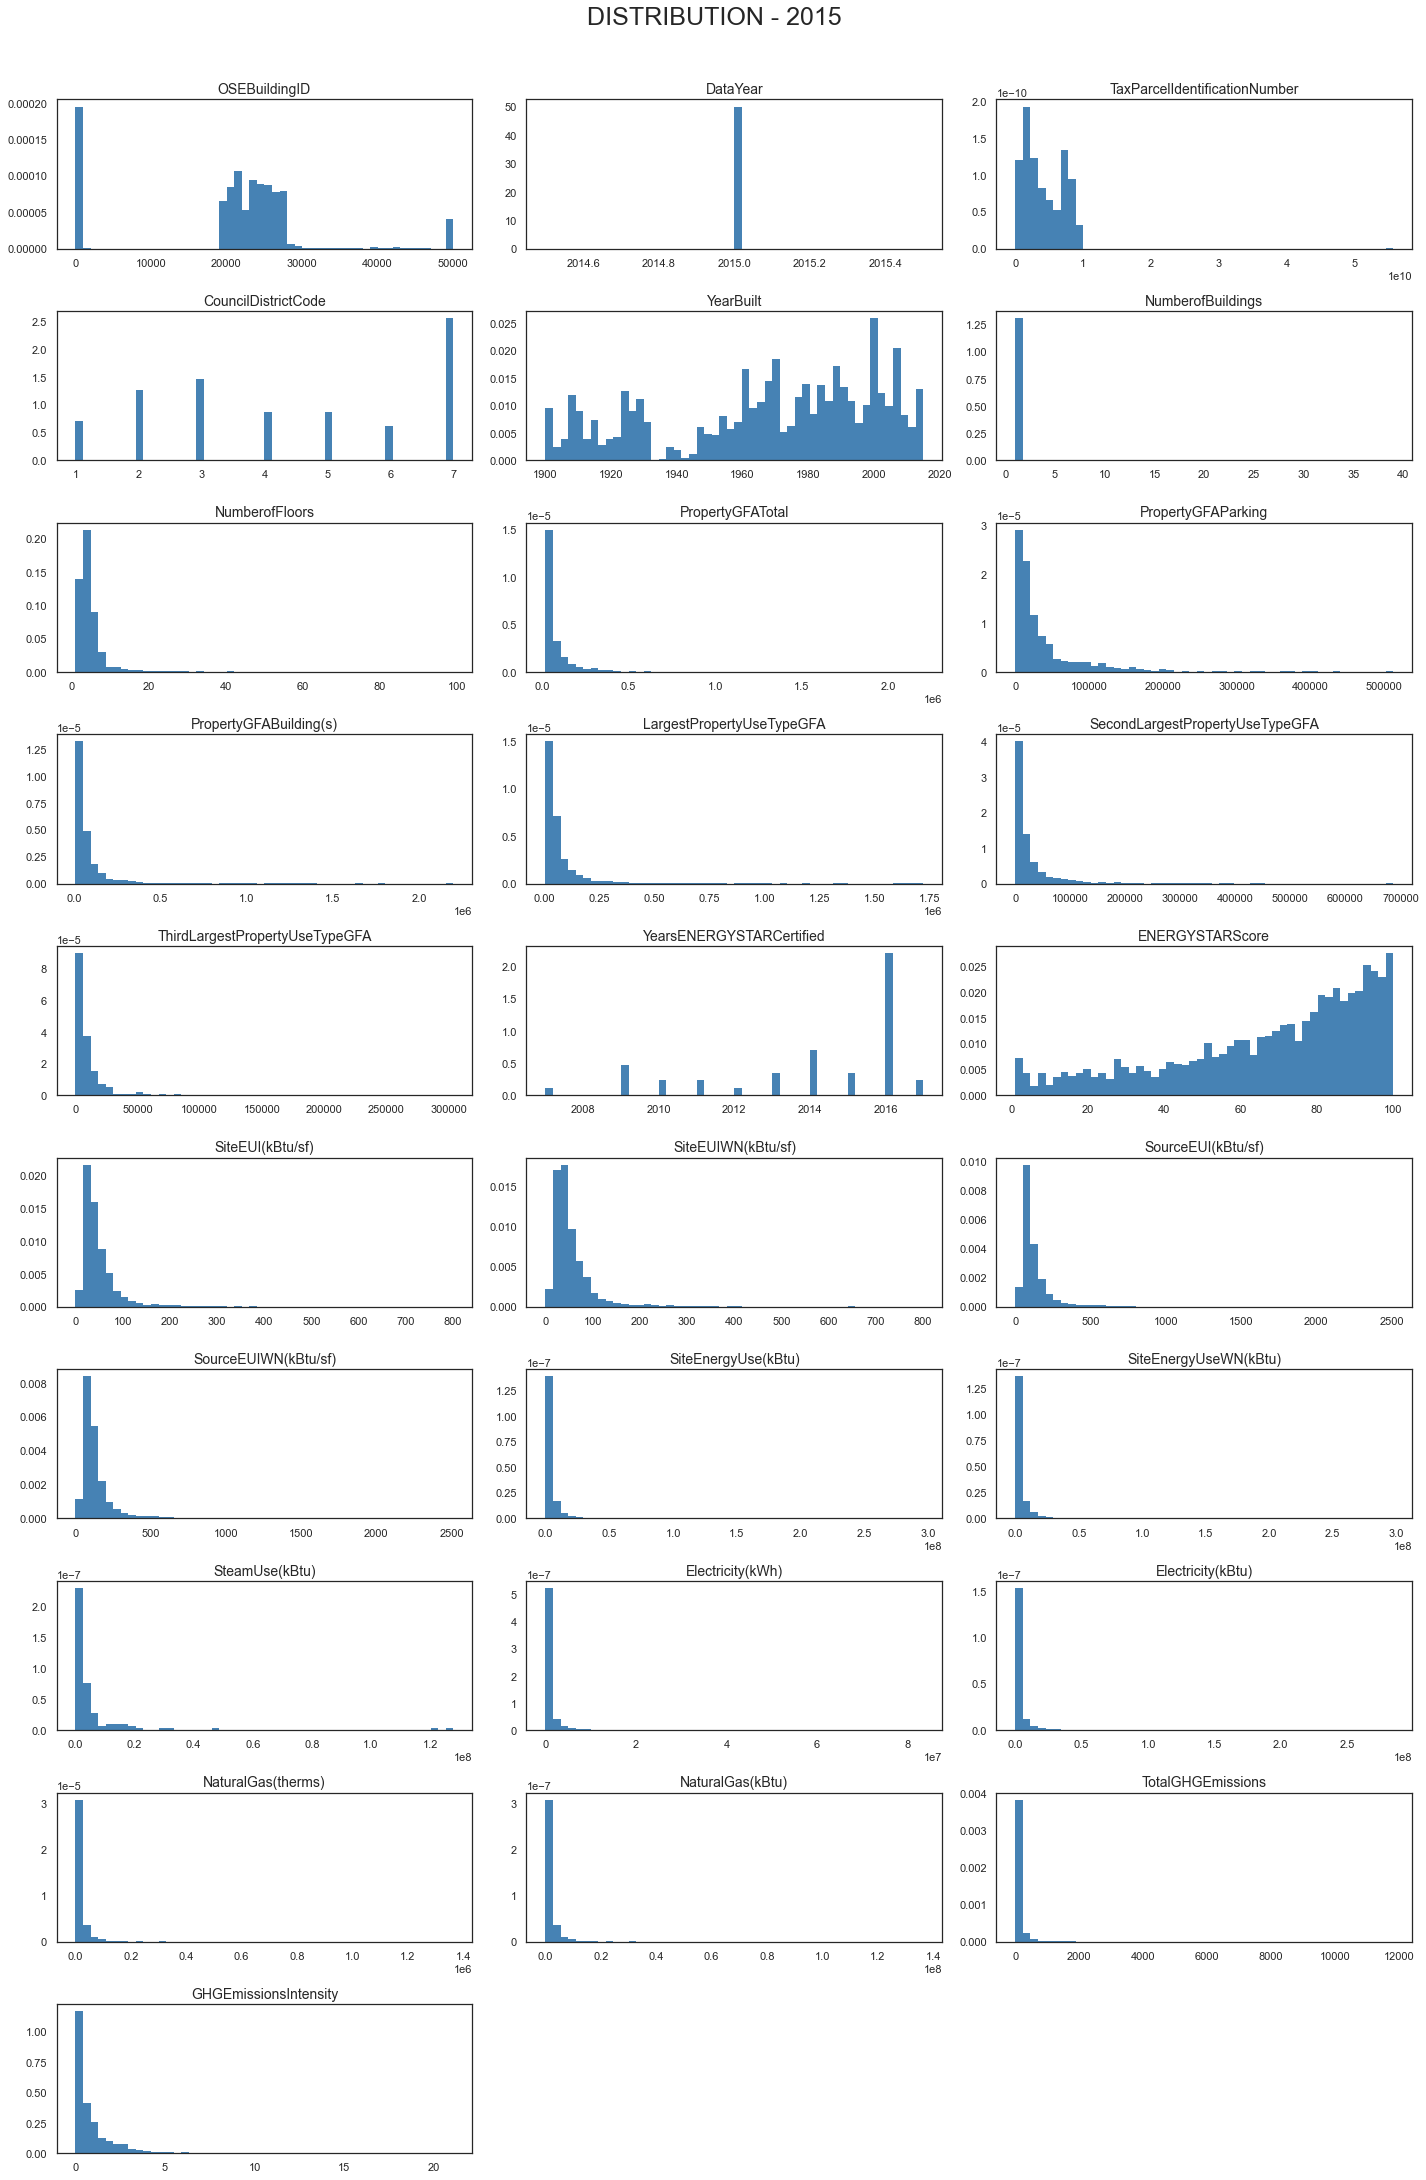

In [42]:
# Plots
fig = plt.figure(figsize=(20,35))
for feat_idx in range(data_float.shape[1]):
    sns.set_theme(style="white")
    ax = fig.add_subplot(12,3, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(data_float.columns[feat_idx], fontsize=14)
    
# Figure title:
plt.tight_layout()
fig.suptitle(f"DISTRIBUTION - {year}", fontsize=25, x = 0.5, y = 1.025)

# Save
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\DISTRIBUTION_{file}.png", transparent=True)

In [43]:
float_measures_lst

['SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'GHGEmissionsIntensity',
 'TotalGHGEmissions']

## Pearson correlation matrix

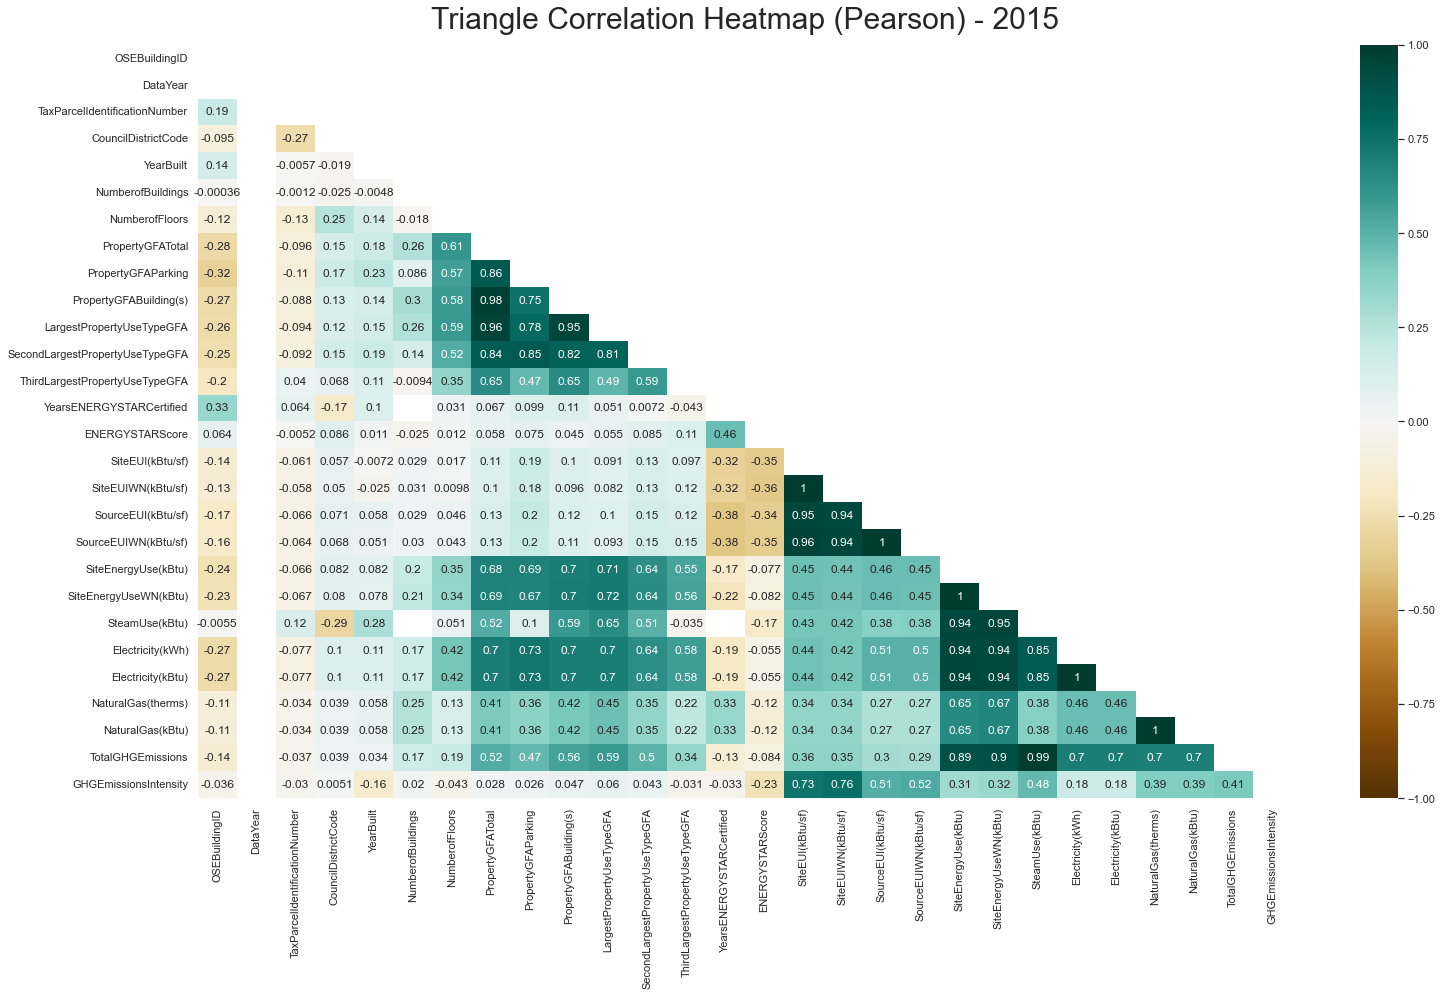

In [44]:
# Heatmap 
plt.figure(figsize=(22, 14))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr()))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title(f'Triangle Correlation Heatmap (Pearson) - {year}', fontdict={'fontsize':30}, pad=16);
plt.tight_layout()

# Fig
fig = heatmap.get_figure()

# Save
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\Heatmap_Pearson_{file}.png", transparent=True)

'SiteEnergyUse(kBtu)' has high correlations with other variables

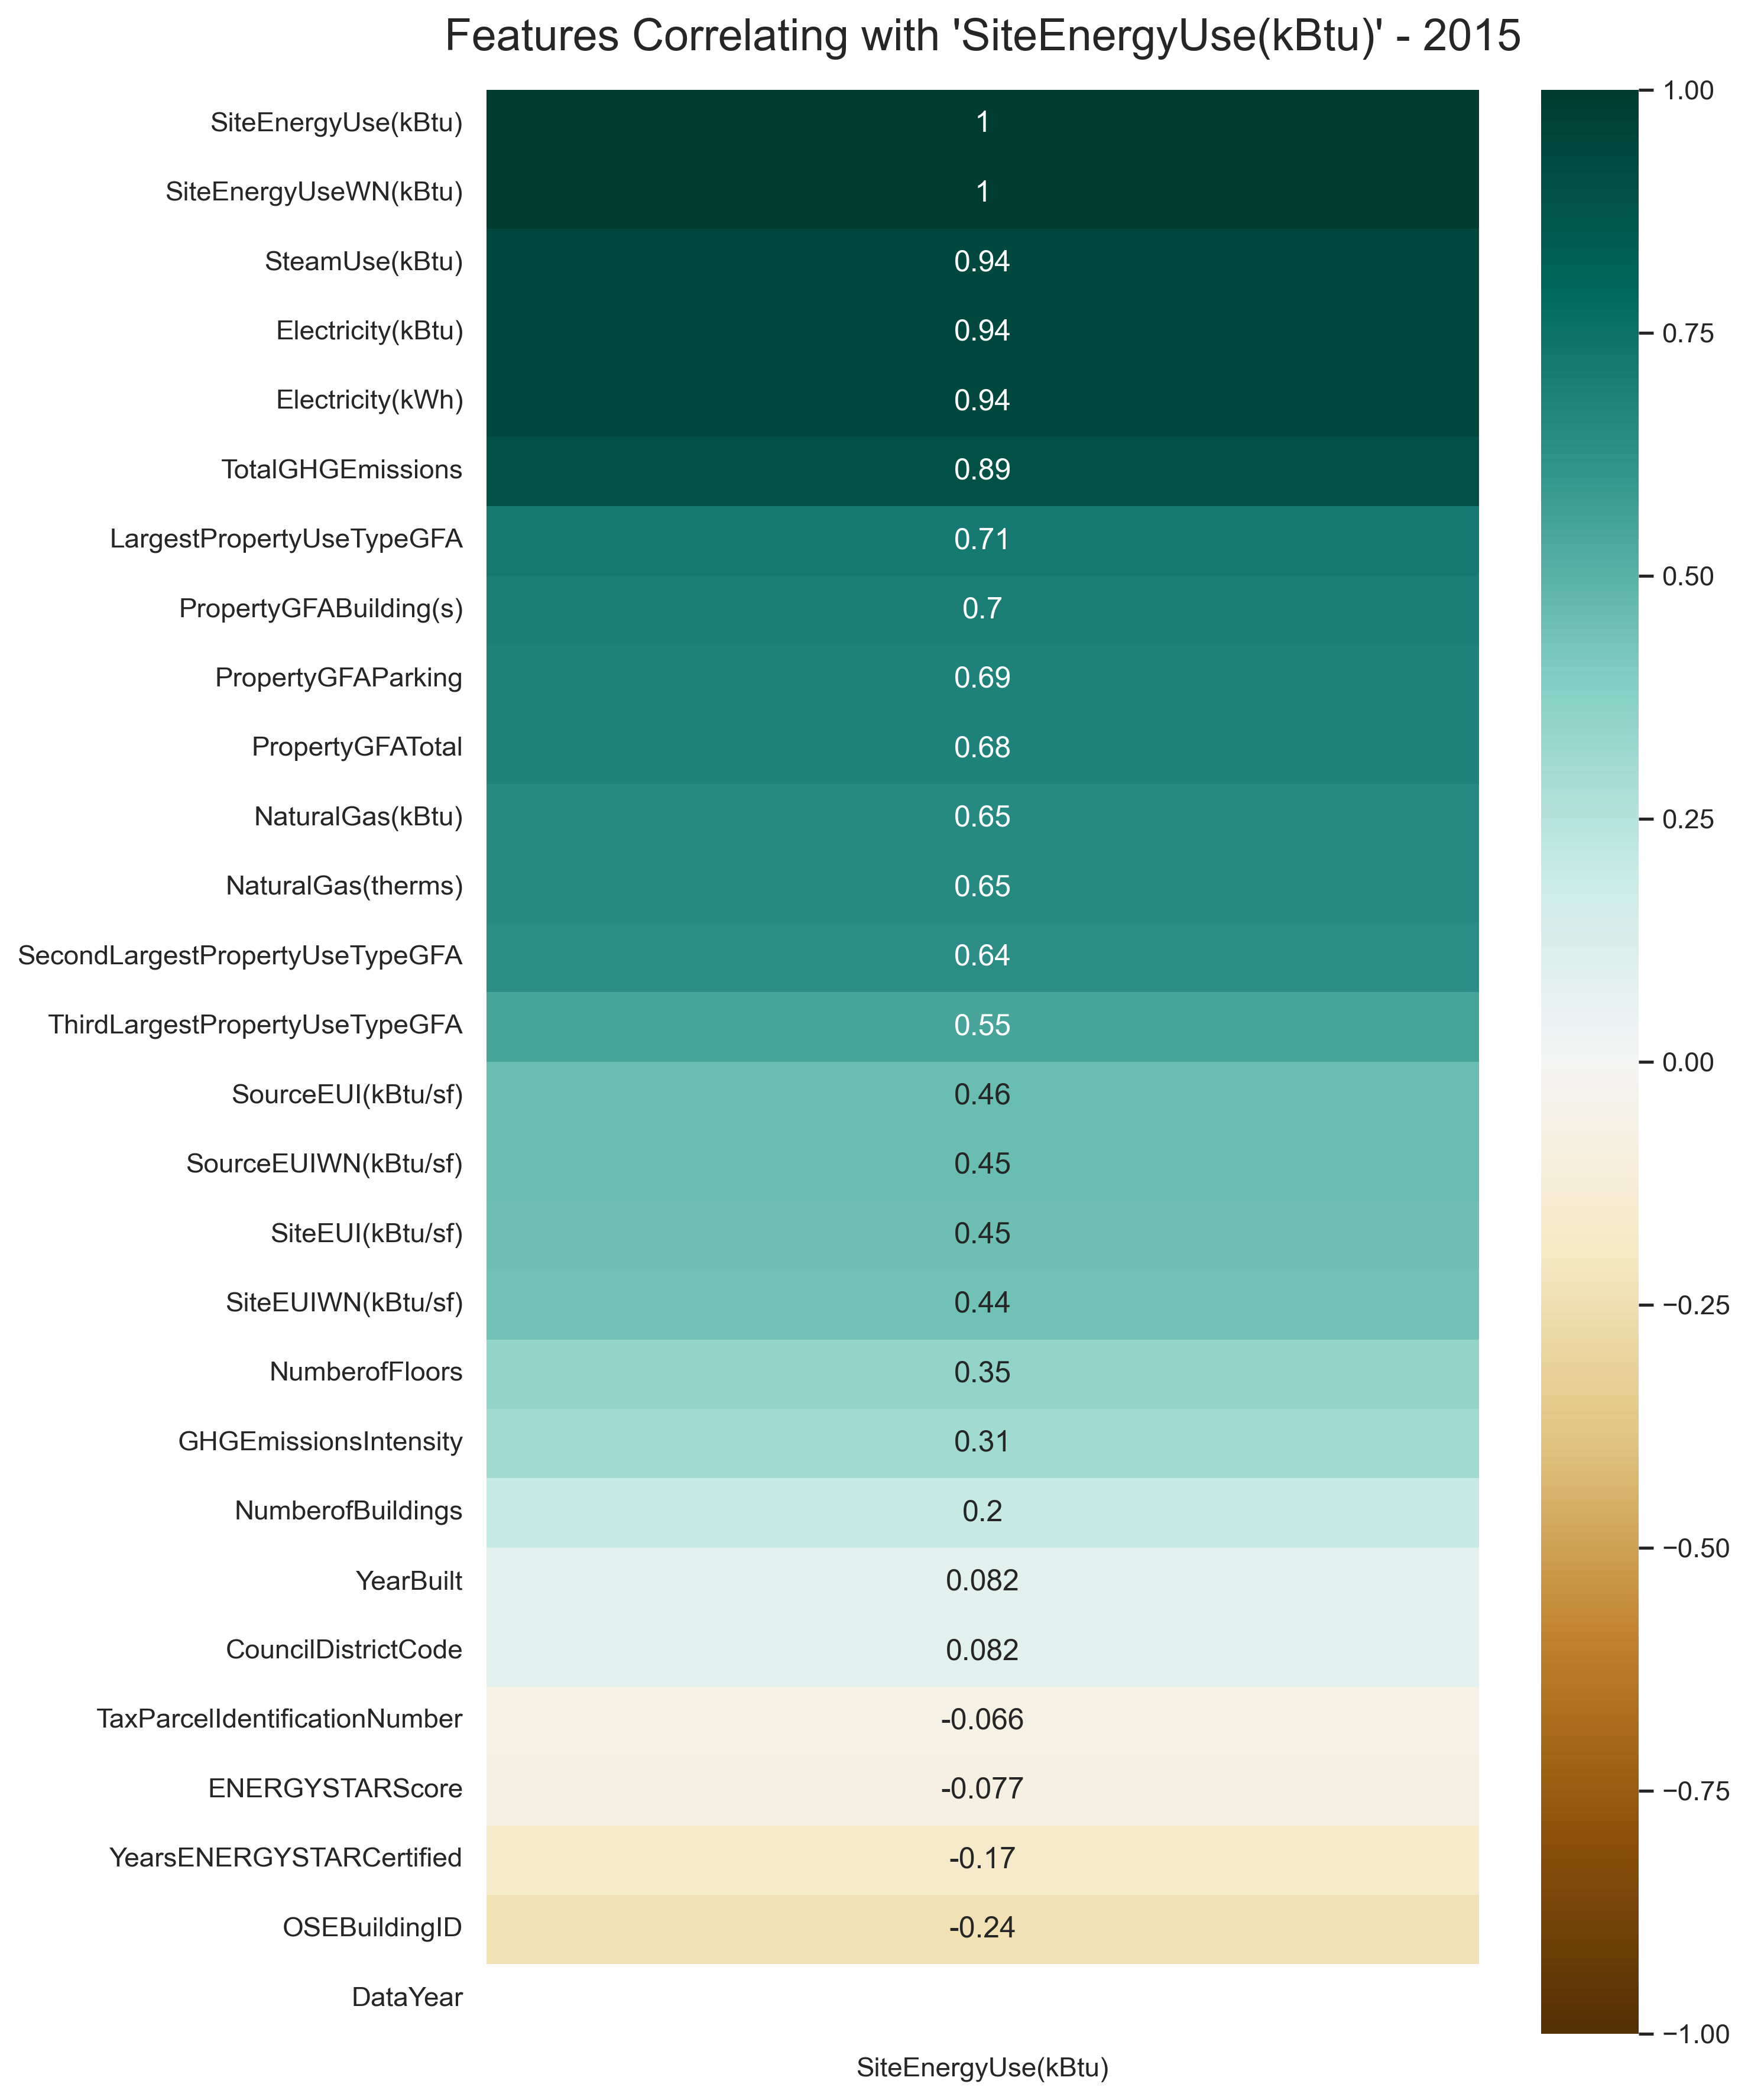

In [45]:
# Plot
plt.figure(figsize=(10, 12), dpi=300)
heatmap = sns.heatmap(data.corr()[['SiteEnergyUse(kBtu)']].sort_values(by='SiteEnergyUse(kBtu)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title(f"Features Correlating with 'SiteEnergyUse(kBtu)' - {year}", fontdict={'fontsize':18}, pad=16)
plt.tight_layout()

# Save
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\'SiteEnergyUse(kBtu)'_Features_{file}.png", transparent=True)

'ENERGYSTARScore' is not correlated with 'SiteEnergyUse(kBtu)'

'SiteEnergyUse(kBtu)' seems correlated with the energy type:
- Electricity(kBtu): 0.94
- SteamUse(kBtu): 0.94
- NaturalGas(kBtu): 0.65

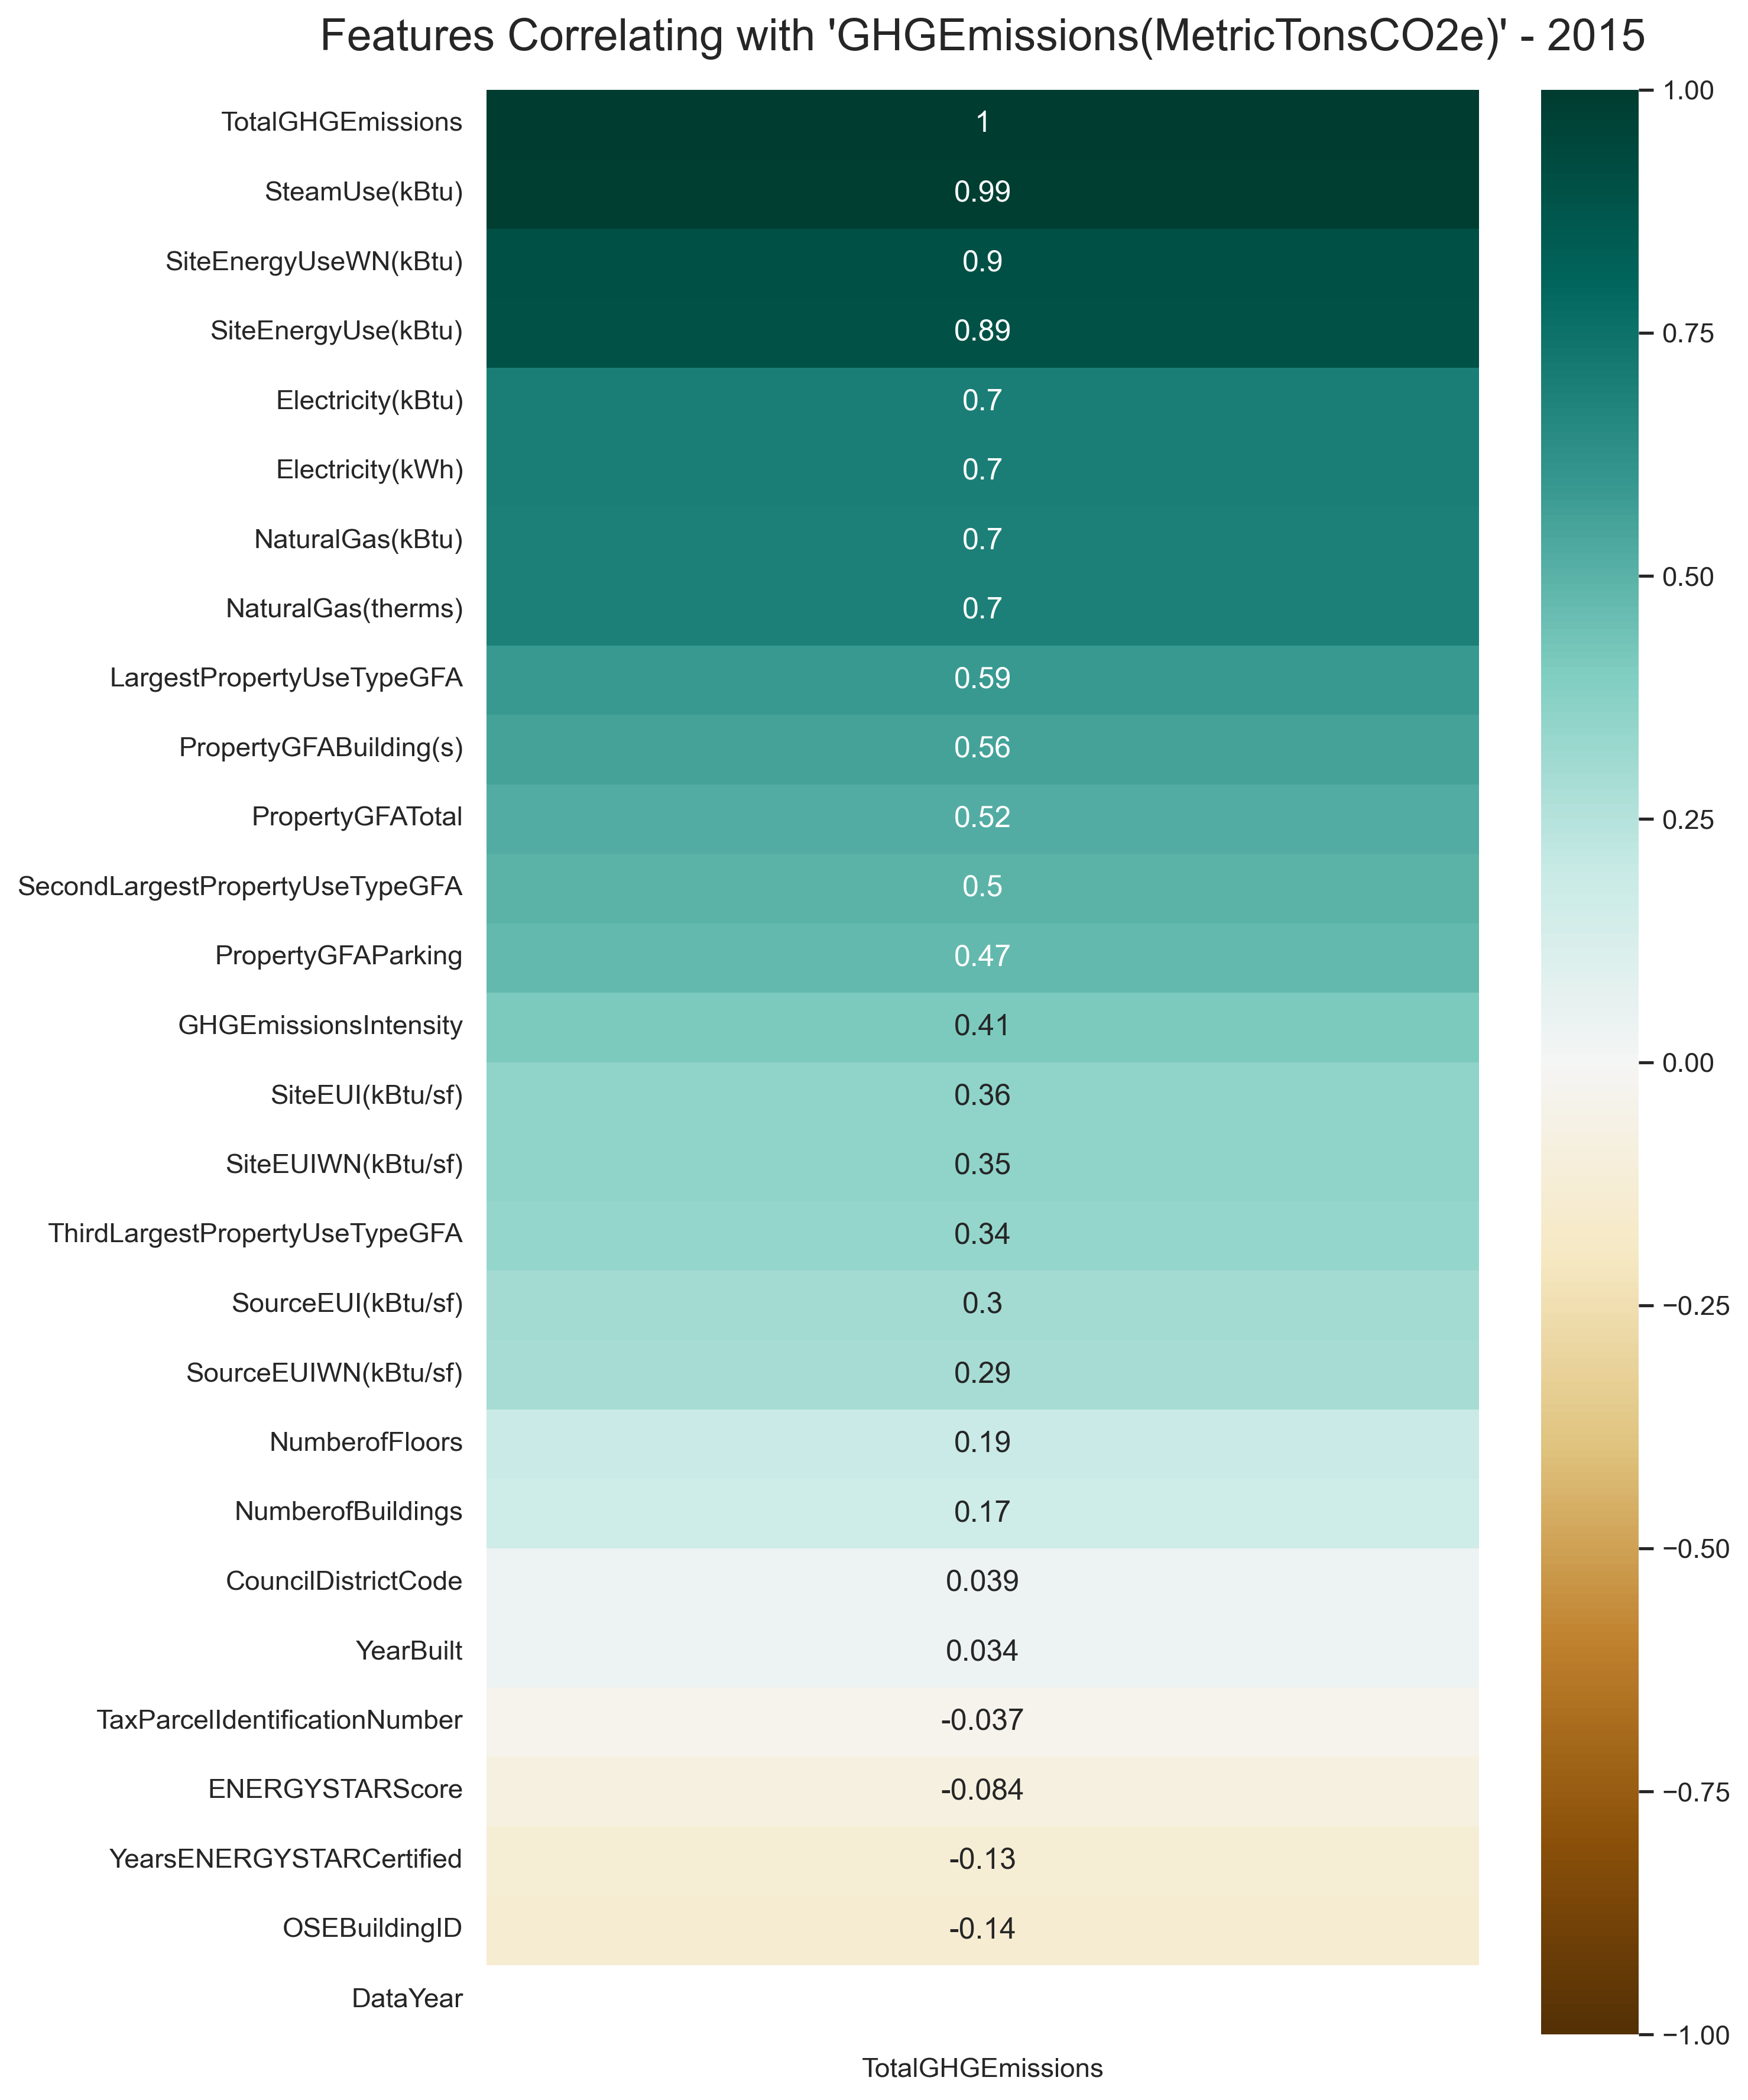

In [46]:
# Plot
plt.figure(figsize=(10, 12), dpi=300)
heatmap = sns.heatmap(data.corr()[['TotalGHGEmissions']].sort_values(by='TotalGHGEmissions', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title(f"Features Correlating with 'GHGEmissions(MetricTonsCO2e)' - {year}", fontdict={'fontsize':18}, pad=16)
plt.tight_layout()

# Save
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\'TotalGHGEmissions'_Features_{file}.png", transparent=True)

## Bivariate analysis

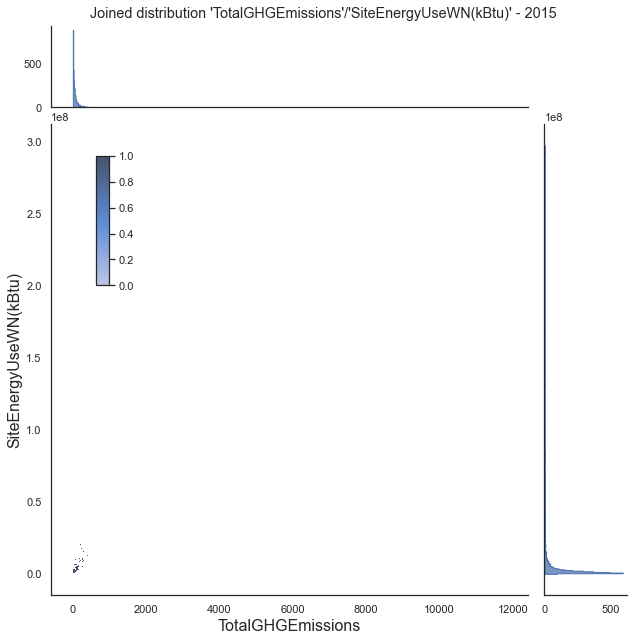

In [47]:
# Plot
g = bi_joint_plot(data, 'TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 9, .1)

g.fig.subplots_adjust(top=0.95) # adjust the Figure in rp
g.fig.suptitle(f"Joined distribution 'TotalGHGEmissions'/'SiteEnergyUseWN(kBtu)' - {year}")

# Save
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\jointplot_'TotalGHGEmissions'_'SiteEnergyUseWN(kBtu)'_{file}.png", transparent=True,dpi=300)

A log transformation is necessary

# DATA TRANSFORMATION

## Calculation of the total energy proportion

In [48]:
# Total of energy per type
elec_total = data['Electricity(kBtu)'].sum()
gas_total = data['NaturalGas(kBtu)'].sum()
steam_total = data['SteamUse(kBtu)'].sum()
energy_total = elec_total + gas_total + steam_total 

# Calculation of proportions
elec_total_prop = elec_total/energy_total
gas_total_prop = gas_total/energy_total
steam_total_prop = steam_total/energy_total

elec_total_prop + gas_total_prop + steam_total_prop 

# Result list
energy_total_prop = [elec_total_prop, gas_total_prop, steam_total_prop]
energy_total_prop

[0.6999574438171805, 0.250666792637252, 0.04937576354556752]

## Imputation by the median

In [49]:
# Copy of dataframe
data_01 = data.copy()

### Measured values (if the column filling rate > 75%)

In [50]:
# Column filling rate
column_data_rate(data)

OSEBuildingID                      1.000000
DataYear                           1.000000
BuildingType                       1.000000
PrimaryPropertyType                1.000000
PropertyName                       1.000000
TaxParcelIdentificationNumber      0.998463
Location                           1.000000
CouncilDistrictCode                1.000000
Neighborhood                       1.000000
YearBuilt                          1.000000
NumberofBuildings                  1.000000
NumberofFloors                     0.996004
PropertyGFATotal                   1.000000
PropertyGFAParking                 0.276668
PropertyGFABuilding(s)             0.999385
ListOfAllPropertyUseTypes          0.962189
LargestPropertyUseType             0.959729
LargestPropertyUseTypeGFA          0.959729
SecondLargestPropertyUseType       0.466031
SecondLargestPropertyUseTypeGFA    0.433139
ThirdLargestPropertyUseType        0.166923
ThirdLargestPropertyUseTypeGFA     0.153704
YearsENERGYSTARCertified        

In [51]:
data['TotalGHGEmissions'].isna().value_counts()

False    3246
True        7
Name: TotalGHGEmissions, dtype: int64

For example, the following variables will be imputed to obtain 100%:
- SiteEnergyUse(kBtu): actuellemment 99,7%
- SiteEnergyUseWN(kBtu): actuellemment 99,7%
- Electricity(kWh): actuellemment 99,7%
- Electricity(kBtu): actuellemment 99,7%
- SteamUse(kBtu): actuellemment 99,7%
- NaturalGas(kBtu): actuellemment 99,7%

In [52]:
# Imputation
for variable in float_measures_lst:
    if data_01[variable].notna().mean() >= 0.75:
        data_01.loc[data_01[variable].isna(), variable] = data_01[variable].median()

In [53]:
# Total of energy per type
elec_total = data_01['Electricity(kBtu)'].sum()
gas_total = data_01['NaturalGas(kBtu)'].sum()
steam_total = data_01['SteamUse(kBtu)'].sum()
energy_total = elec_total + gas_total + steam_total

# Calculation of proportions
elec_total_prop = elec_total/energy_total
gas_total_prop = gas_total/energy_total
steam_total_prop = steam_total/energy_total

elec_total_prop + gas_total_prop + steam_total_prop 


1.0

In [54]:
# Result list
energy_total_prop_bis_2 = [elec_total_prop, gas_total_prop, steam_total_prop]
energy_total_prop_bis_2

[0.7001093768110518, 0.25053986212194773, 0.04935076106700048]

### 'NumberofBuildings'

In [55]:
# Other imputation
if (int(year) == 2016) | (int(year) == 2017):
    data_01.loc[data_01['NumberofBuildings'].isna(), 'NumberofBuildings'] = int(data_01['NumberofBuildings'].median())

### 'NumberofFloors'

In [56]:
# Other imputation
data_01.loc[data_01['NumberofFloors'].isna(), 'NumberofFloors'] = int(data_01['NumberofFloors'].median())

### 'ENERGYSTARScore'

In [57]:
# Other imputation
data_01.loc[data_01['ENERGYSTARScore'].isna(), 'ENERGYSTARScore'] = int(data_01['ENERGYSTARScore'].median())

### 'CouncilDistrictCode'

In [58]:
# Other imputation
data_01.loc[data_01['CouncilDistrictCode'].isna(), 'CouncilDistrictCode'] = int(data_01['CouncilDistrictCode'].median())

In [59]:
# Column filling rate
column_data_rate(data_01)

OSEBuildingID                      1.000000
DataYear                           1.000000
BuildingType                       1.000000
PrimaryPropertyType                1.000000
PropertyName                       1.000000
TaxParcelIdentificationNumber      0.998463
Location                           1.000000
CouncilDistrictCode                1.000000
Neighborhood                       1.000000
YearBuilt                          1.000000
NumberofBuildings                  1.000000
NumberofFloors                     1.000000
PropertyGFATotal                   1.000000
PropertyGFAParking                 0.276668
PropertyGFABuilding(s)             0.999385
ListOfAllPropertyUseTypes          0.962189
LargestPropertyUseType             0.959729
LargestPropertyUseTypeGFA          0.959729
SecondLargestPropertyUseType       0.466031
SecondLargestPropertyUseTypeGFA    0.433139
ThirdLargestPropertyUseType        0.166923
ThirdLargestPropertyUseTypeGFA     0.153704
YearsENERGYSTARCertified        

## Numerical variable - log transformation

### Log transformation

Log transformation for the measured values

In [60]:
# Copy of dataframe
data_02 = data_01.copy()

In [61]:
# Check that infinite values are avoided
data_02['GHGEmissionsIntensity'].min()

0.01

In [62]:
# Check that infinite values are avoided
data_02['TotalGHGEmissions'].min()

0.08

In [63]:
# Log transformation except the following variables: 
lst_no_log = ['OSEBuildingID','DataYear','TaxParcelIdentificationNumber', 'CouncilDistrictCode',
              'YearBuilt','NumberofFloors','ENERGYSTARScore','YearsENERGYSTARCertified','NumberofBuildings']

if (int(year) == 2018) | (int(year) == 2019) | (int(year) == 2020):
    lst_no_log.remove('YearsENERGYSTARCertified')

if (int(year) == 2019) | (int(year) == 2020):
    lst_no_log.remove('NumberofBuildings')

In [64]:
# Log transformation
print("Log transformation for the following variables:\n")
for variable in float_measures_lst:
    data_02[variable] = data_02[variable].map(lambda x: np.log10(x) if x!=np.NaN else np.NaN)
    print(variable)

Log transformation for the following variables:

SiteEUI(kBtu/sf)
SiteEUIWN(kBtu/sf)
SourceEUI(kBtu/sf)
SourceEUIWN(kBtu/sf)
SiteEnergyUse(kBtu)
SiteEnergyUseWN(kBtu)
SteamUse(kBtu)
Electricity(kWh)
Electricity(kBtu)
NaturalGas(therms)
NaturalGas(kBtu)
GHGEmissionsIntensity
TotalGHGEmissions


In [65]:
# Column filling rate
column_data_rate(data_02)

OSEBuildingID                      1.000000
DataYear                           1.000000
BuildingType                       1.000000
PrimaryPropertyType                1.000000
PropertyName                       1.000000
TaxParcelIdentificationNumber      0.998463
Location                           1.000000
CouncilDistrictCode                1.000000
Neighborhood                       1.000000
YearBuilt                          1.000000
NumberofBuildings                  1.000000
NumberofFloors                     1.000000
PropertyGFATotal                   1.000000
PropertyGFAParking                 0.276668
PropertyGFABuilding(s)             0.999385
ListOfAllPropertyUseTypes          0.962189
LargestPropertyUseType             0.959729
LargestPropertyUseTypeGFA          0.959729
SecondLargestPropertyUseType       0.466031
SecondLargestPropertyUseTypeGFA    0.433139
ThirdLargestPropertyUseType        0.166923
ThirdLargestPropertyUseTypeGFA     0.153704
YearsENERGYSTARCertified        

## VARIABLE CREATION

### 'elec_gas_steam_otherfuel_prop'

Let's calculate the proportion of energy per building:

In [66]:
# proportion of energy (other function when the column filling rate is not 100%)
def energy_prop(u, v, w):
    """Calculation the proportion of energy per building. Return a list in the following order"""
    """proportion of: ['Electricity(kBtu)','NaturalGas(kBtu)','SteamUse(kBtu)']"""

    # Calculation of the energy total
    if np.isnan(u):
        var1 = 0
    else:
        var1 = u

    if np.isnan(v):
        var2 = 0
    else:
        var2 = v

    if np.isnan(w):
        var3 = 0
    else:
        var3 = w

    energy_sum = var1 + var2 + var3


    # Calculation of proportions 
    energy_prop = []
    elec_prop = 0
    natural_gas_prop = 0
    steam_prop = 0   
    
    if energy_sum == 0:
        energy_prop = [0,0,0]
    else:
        if np.isnan(u):
            elec_prop = np.NaN
        else:
            elec_prop = u/energy_sum

        if np.isnan(v):
            natural_gas_prop = np.NaN
        else:
            natural_gas_prop = v/energy_sum

        if np.isnan(w):
            steam_prop = np.NaN
        else:
            steam_prop = w/energy_sum


    energy_prop.append(elec_prop)
    energy_prop.append(natural_gas_prop)
    energy_prop.append(steam_prop)

    return energy_prop 

In [67]:
# Column creation
data_02['elec_gas_steam_otherfuel_prop'] = data.apply(lambda row: energy_prop(row['Electricity(kBtu)'], row['NaturalGas(kBtu)'], row['SteamUse(kBtu)']), axis = 1)
data_02['elec_gas_steam_otherfuel_prop']

1          [0.435588738505571, 0.564411261494429, nan]
2       [0.6487819908516343, 0.35121800914836565, nan]
3       [0.5650038697094608, 0.43499613029053913, nan]
4                                      [1.0, nan, nan]
5       [0.6715924269259311, 0.32840757307406887, nan]
                             ...                      
3334                                   [1.0, nan, nan]
3335     [0.4034312522161307, 0.5965687477838693, nan]
3336    [0.7088533952567053, 0.29114660474329473, nan]
3338     [0.5743037104955222, 0.4256962895044778, nan]
3339                                   [1.0, nan, nan]
Name: elec_gas_steam_otherfuel_prop, Length: 3253, dtype: object

This variable calculation is only for information purpose

### 'energy_type_01'

The log transformation is not used to calculate the following variables.

les sources d'énergie sont classées par intensité et les modalités suivantes sont affectées:
nan, 'gas', 'other fuel', 'electricity', 'steam' puis labellisées

In [68]:
# Primary energy source
def energy_type_01(u, v, w):
    """Identify the primary energy source between ['electricity', 'gas', 'steam', 'other fuel']"""
    """caution: follow the argument order"""
    
    df = pd.DataFrame([u,v,w], columns=['a'] )
    df['b'] = ['electricity', 'gas', 'steam']
    df.sort_values(by=['a'], ascending=False,inplace=True)

    df.reset_index(inplace=True)
    type_01 = df['b'].iloc[0]

    if np.isnan(df['a'].iloc[0]):
        return np.NaN
    else:
        return type_01

In [69]:
# Column creation
data_02['energy_type_01'] = data.apply(lambda row: energy_type_01(row['Electricity(kBtu)'], row['NaturalGas(kBtu)'], row['SteamUse(kBtu)']), axis = 1)
data_02['energy_type_01']

1               gas
2       electricity
3       electricity
4       electricity
5       electricity
           ...     
3334    electricity
3335            gas
3336    electricity
3338    electricity
3339    electricity
Name: energy_type_01, Length: 3253, dtype: object

In [70]:
data_02['energy_type_01'].unique()

array(['gas', 'electricity', 'steam', nan], dtype=object)

In [71]:
# Class creation when NAN
data_02['energy_type_01'] = data_02['energy_type_01'].fillna('Class Missing')

### 'energy_type_02'

In [72]:
# Secondary energy source
def energy_type_02(u, v, w):
    """Identify the secondary energy source between ['electricity', 'gas', 'steam', 'other fuel']"""
    """caution: follow the argument order"""
    df = pd.DataFrame([u,v,w], columns=['a'] )
    df['b'] = ['electricity', 'gas', 'steam']
    df.sort_values(by=['a'], ascending=False,inplace=True)

    df.reset_index(inplace=True)
    type_02 = df['b'].iloc[1]
    
    if np.isnan(df['a'].iloc[1]):
        return np.NaN
    else:
        return type_02

In [73]:
# Column creation
data_02['energy_type_02'] = data.apply(lambda row: energy_type_02(row['Electricity(kBtu)'], row['NaturalGas(kBtu)'], row['SteamUse(kBtu)']), axis = 1)
data_02['energy_type_02']

1       electricity
2               gas
3               gas
4               NaN
5               gas
           ...     
3334            NaN
3335    electricity
3336            gas
3338            gas
3339            NaN
Name: energy_type_02, Length: 3253, dtype: object

In [74]:
data_02['energy_type_02'].unique()

array(['electricity', 'gas', nan, 'steam'], dtype=object)

In [75]:
# Class creation when NAN 
data_02['energy_type_02'] = data_02['energy_type_02'].fillna('Class Missing')

### 'energy_type_03'

In [76]:
# Tertiary energy source
def energy_type_03(u, v, w):
    """Identify the tertiary energy source between ['electricity', 'gas', 'steam', 'other fuel']"""
    """caution: follow the argument order"""
    df = pd.DataFrame([u,v,w], columns=['a'] )
    df['b'] = ['electricity', 'gas', 'steam']
    df.sort_values(by=['a'], ascending=False,inplace=True)

    df.reset_index(inplace=True)
    type_03 = df['b'].iloc[2]
    
    if np.isnan(df['a'].iloc[2]):
        return np.NaN
    else:
        return type_03

In [77]:
# Column creation
data_02['energy_type_03'] = data.apply(lambda row: energy_type_03(row['Electricity(kBtu)'], row['NaturalGas(kBtu)'], row['SteamUse(kBtu)']), axis = 1)
data_02['energy_type_03']

1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
3334    NaN
3335    NaN
3336    NaN
3338    NaN
3339    NaN
Name: energy_type_03, Length: 3253, dtype: object

In [78]:
data_02['energy_type_03'].unique()

array([nan, 'gas', 'electricity', 'steam'], dtype=object)

In [79]:
# Class creation when NAN 
data_02['energy_type_03'] = data_02['energy_type_03'].fillna('Class Missing')

In [80]:
# Column filling rate
column_data_rate(data_02)

OSEBuildingID                      1.000000
DataYear                           1.000000
BuildingType                       1.000000
PrimaryPropertyType                1.000000
PropertyName                       1.000000
TaxParcelIdentificationNumber      0.998463
Location                           1.000000
CouncilDistrictCode                1.000000
Neighborhood                       1.000000
YearBuilt                          1.000000
NumberofBuildings                  1.000000
NumberofFloors                     1.000000
PropertyGFATotal                   1.000000
PropertyGFAParking                 0.276668
PropertyGFABuilding(s)             0.999385
ListOfAllPropertyUseTypes          0.962189
LargestPropertyUseType             0.959729
LargestPropertyUseTypeGFA          0.959729
SecondLargestPropertyUseType       0.466031
SecondLargestPropertyUseTypeGFA    0.433139
ThirdLargestPropertyUseType        0.166923
ThirdLargestPropertyUseTypeGFA     0.153704
YearsENERGYSTARCertified        

#### target encoding

In [81]:
data_02['energy_type_03'].unique()

array(['Class Missing', 'gas', 'electricity', 'steam'], dtype=object)

In [82]:
# Encoder instance
target_encoder = TargetEncoder()

# fitting
target_encoder.fit(data_02['energy_type_03'], data_02['SiteEnergyUseWN(kBtu)'])

C:\Users\vince\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TargetEncoder(cols=['energy_type_03'])

In [83]:
# target encoding
data_02 = target_encoding_transform_with_merge(data_02, 'energy_type_03', 'OSEBuildingID', target_encoder, 'energy_type_03_TargetEncoded')

In [84]:
# Column filling rate
column_data_rate(data_02)

OSEBuildingID                      1.000000
DataYear                           1.000000
BuildingType                       1.000000
PrimaryPropertyType                1.000000
PropertyName                       1.000000
TaxParcelIdentificationNumber      0.998463
Location                           1.000000
CouncilDistrictCode                1.000000
Neighborhood                       1.000000
YearBuilt                          1.000000
NumberofBuildings                  1.000000
NumberofFloors                     1.000000
PropertyGFATotal                   1.000000
PropertyGFAParking                 0.276668
PropertyGFABuilding(s)             0.999385
ListOfAllPropertyUseTypes          0.962189
LargestPropertyUseType             0.959729
LargestPropertyUseTypeGFA          0.959729
SecondLargestPropertyUseType       0.466031
SecondLargestPropertyUseTypeGFA    0.433139
ThirdLargestPropertyUseType        0.166923
ThirdLargestPropertyUseTypeGFA     0.153704
YearsENERGYSTARCertified        

In [85]:
# encoder instance
target_encoder = TargetEncoder()

# fitting
target_encoder.fit(data_02['energy_type_02'], data_02['SiteEnergyUseWN(kBtu)'])

TargetEncoder(cols=['energy_type_02'])

In [86]:
# target encoding
data_02 = target_encoding_transform_with_merge(data_02, 'energy_type_02', 'OSEBuildingID', target_encoder, 'energy_type_02_TargetEncoded')

In [87]:
# encoder instance
target_encoder = TargetEncoder()

# fitting
target_encoder.fit(data_02['energy_type_01'], data_02['SiteEnergyUseWN(kBtu)'])

TargetEncoder(cols=['energy_type_01'])

In [88]:
# encoding
data_02 = target_encoding_transform_with_merge(data_02, 'energy_type_01', 'OSEBuildingID', target_encoder, 'energy_type_01_TargetEncoded')

## Numerical variables - discretization

### 'SiteEnergyUse(kBtu)'

#### 4 classes

In [89]:
if int(year) == 2015: 
    var_1 = data_02['SiteEnergyUse(kBtu)'].quantile(q=0.05)
    print(var_1)

5.700368415652791


In [90]:
if int(year) == 2015: 
    var_2 = data_02['SiteEnergyUse(kBtu)'].quantile(q=0.7)
    print(var_2)

6.499465451599453


In [91]:
if int(year) == 2015: 
    var_3 = data_02['SiteEnergyUse(kBtu)'].quantile(q=0.95)
    print(var_3)

7.241071809508594


In [92]:
# target discretization function
def target_cat(x, u=var_1, v=var_2, w=var_3):
    """target discretization"""
    
    if (x<u):
        out = 'Lowest Use'
    
    if (x>=u and x<v):
        out = 'Medium-Low'
    
    if (x>=v and x<w):
        out = 'Medium-High'
    
    if (x>=w):
        out = 'Highest Use'
        
    return out

In [93]:
# target discretization
data_02['SiteEnergyUse(kBtu)_cat'] = data_02['SiteEnergyUse(kBtu)'].apply(lambda x: target_cat(x))

In [94]:
data_02['SiteEnergyUse(kBtu)_cat']

0        Medium-Low
1       Medium-High
2       Highest Use
3       Medium-High
4       Medium-High
           ...     
3248     Medium-Low
3249     Medium-Low
3250    Medium-High
3251     Medium-Low
3252     Medium-Low
Name: SiteEnergyUse(kBtu)_cat, Length: 3253, dtype: object

In [95]:
data_02['SiteEnergyUse(kBtu)_cat'].value_counts()

Medium-Low     2114
Medium-High     813
Highest Use     163
Lowest Use      163
Name: SiteEnergyUse(kBtu)_cat, dtype: int64

#### label encoding

In [96]:
# A preprocessing is used to labelize in the same way all the years

# Need to start by 2015
if int(year) == 2015: 
    # creating instance of labelencoder
    labelencoder = preprocessing.LabelEncoder()

In [97]:
# Création of a dataframe before encoding
SiteEnergyUse_df = pd.DataFrame(data_02['SiteEnergyUse(kBtu)_cat'].unique(), columns=['SiteEnergyUse(kBtu)_cat'])
SiteEnergyUse_df['SiteEnergyUse(kBtu)_cat'] = SiteEnergyUse_df['SiteEnergyUse(kBtu)_cat'].astype('category')

# fitting
labelencoder.fit(SiteEnergyUse_df['SiteEnergyUse(kBtu)_cat'])

LabelEncoder()

In [98]:
# encoding
data_02 = label_encoding_transform_with_merge(data_02, 'SiteEnergyUse(kBtu)_cat', 'OSEBuildingID', labelencoder, 'SiteEnergyUse(kBtu)_cat_LabelEncoded')

### 'SiteEnergyUseWN(kBtu)'

#### 4 classes

The same discretization is used for all the years. The values corresponding to q=[0, 0.05, 0.7, 0.95, 1] are used with the year 2015

In [99]:
if int(year) == 2015: 
    var_1 = data_02['SiteEnergyUseWN(kBtu)'].quantile(q=0.05)
    print(var_1)

5.735090856513309


In [100]:
if int(year) == 2015: 
    var_2 = data_02['SiteEnergyUseWN(kBtu)'].quantile(q=0.7)
    print(var_2)

6.5410789857747265


In [101]:
if int(year) == 2015: 
    var_3 = data_02['SiteEnergyUseWN(kBtu)'].quantile(q=0.95)
    print(var_3)

7.251600291501371


In [102]:
# discretization
data_02['SiteEnergyUseWN(kBtu)_cat'] = data_02['SiteEnergyUseWN(kBtu)'].apply(lambda x: target_cat(x))

In [103]:
data_02['SiteEnergyUseWN(kBtu)_cat'].value_counts()

Medium-Low     2080
Medium-High     891
Highest Use     164
Lowest Use      118
Name: SiteEnergyUseWN(kBtu)_cat, dtype: int64

#### label encoding

In [104]:
# Creation of a dataframe before encoding
SiteEnergyUse_df = pd.DataFrame(data_02['SiteEnergyUseWN(kBtu)_cat'].unique(), columns=['SiteEnergyUseWN(kBtu)_cat'])
SiteEnergyUse_df['SiteEnergyUseWN(kBtu)_cat'] = SiteEnergyUse_df['SiteEnergyUseWN(kBtu)_cat'].astype('category')

# Fitting
labelencoder.fit(SiteEnergyUse_df['SiteEnergyUseWN(kBtu)_cat'])

LabelEncoder()

In [105]:
# discretization
data_02 = label_encoding_transform_with_merge(data_02, 'SiteEnergyUseWN(kBtu)_cat', 'OSEBuildingID', labelencoder, 'SiteEnergyUseWN(kBtu)_cat_LabelEncoded')

## Categorical variables - encoding for the selected ones

In [106]:
# Filling rate by column
column_data_rate(data_02)

OSEBuildingID                             1.000000
DataYear                                  1.000000
BuildingType                              1.000000
PrimaryPropertyType                       1.000000
PropertyName                              1.000000
TaxParcelIdentificationNumber             0.998463
Location                                  1.000000
CouncilDistrictCode                       1.000000
Neighborhood                              1.000000
YearBuilt                                 1.000000
NumberofBuildings                         1.000000
NumberofFloors                            1.000000
PropertyGFATotal                          1.000000
PropertyGFAParking                        0.276668
PropertyGFABuilding(s)                    0.999385
ListOfAllPropertyUseTypes                 0.962189
LargestPropertyUseType                    0.959729
LargestPropertyUseTypeGFA                 0.959729
SecondLargestPropertyUseType              0.466031
SecondLargestPropertyUseTypeGFA

### 'PrimaryPropertyType'

#### Creation of hierarchical categories

In [107]:
data_02['PrimaryPropertyType'].nunique()

27

In [108]:
data_02['PrimaryPropertyType'].value_counts(True)

Low-Rise Multifamily           0.295727
Mid-Rise Multifamily           0.160467
Small- and Mid-Sized Office    0.087304
Other                          0.079311
Non-Refrigerated Warehouse     0.057485
Large Office                   0.049493
K-12 School                    0.041193
Mixed Use Property             0.038733
High-Rise Multifamily          0.030741
Retail Store                   0.029511
Worship Facility               0.022133
Hotel                          0.021826
Distribution Center\n          0.015678
Medical Office                 0.013219
Senior Care Community          0.013219
Supermarket/Grocery Store      0.011067
Self-Storage Facility\n        0.008300
College/University             0.006763
Residence Hall/Dormitory       0.004611
Refrigerated Warehouse         0.003996
Restaurant\n                   0.003381
Hospital                       0.003074
SPS-District K-12              0.001230
Distribution Center            0.000615
Laboratory                     0.000307


In [109]:
# sorting
data_02.groupby('PrimaryPropertyType')['SiteEnergyUse(kBtu)'].median().sort_values(ascending=False)

PrimaryPropertyType
Hospital                       7.934831
Laboratory                     7.402955
Distribution Center            7.106195
Large Office                   7.071788
Supermarket/Grocery Store      6.969824
Hotel                          6.832970
High-Rise Multifamily          6.811255
Medical Office                 6.778904
Self-Storage Facility          6.725820
Senior Care Community          6.718616
Restaurant\n                   6.650368
College/University             6.600835
Other                          6.519108
Mixed Use Property             6.367361
Retail Store                   6.362644
K-12 School                    6.316231
Small- and Mid-Sized Office    6.314625
Mid-Rise Multifamily           6.285439
Residence Hall/Dormitory       6.269723
SPS-District K-12              6.182950
Refrigerated Warehouse         6.104767
Non-Refrigerated Warehouse     6.075329
Distribution Center\n          6.040283
Restaurant                     5.983003
Low-Rise Multifamily

In [110]:
data_02['PrimaryPropertyType'].unique()

array(['Hotel', 'High-Rise Multifamily', 'Supermarket/Grocery Store',
       'K-12 School', 'Small- and Mid-Sized Office', 'Large Office',
       'Distribution Center\n', 'Other', 'Non-Refrigerated Warehouse',
       'Hospital', 'Mixed Use Property', 'Self-Storage Facility\n',
       'Retail Store', 'Senior Care Community', 'Medical Office',
       'Residence Hall/Dormitory', 'Mid-Rise Multifamily',
       'College/University', 'Low-Rise Multifamily',
       'Refrigerated Warehouse', 'Distribution Center',
       'Worship Facility', 'Laboratory', 'Self-Storage Facility',
       'SPS-District K-12', 'Restaurant\n', 'Restaurant'], dtype=object)

In [111]:
# hierarchical category
xType_01 = ['Multifamily Housing', 'Multifamily HR (10+)',
            'Multifamily LR (1-4)', 'Multifamily MR (5-9)']

In [112]:
# hierarchical category
xType_02 = ['Office','Medical Office','Financial Office',
                          'Other - Public Services','Bank Branch',
                         'Other - Services', 'Police Station',
                          'Small- and Mid-Sized Office','Large Office',
                         'Police Stat','Medical Off','Financial O','Other - Ser']

In [113]:
# hierarchical category
xType_03 = ['K-12 School','College/University','Adult Education',
                          'Pre-school/Daycare',
                          'Other - Education','SPS-District K-12','University',
                         'College/Uni','Other - Edu','Adult Educa','Pre-school/',
                         'Vocational School']

In [114]:
# hierarchical category
xType_04 = ['Mixed Use Property','High-Rise Multifamily',
                          'Mid-Rise Multifamily','Low-Rise Multifamily','Multifamily']

In [115]:
# hierarchical category
xType_05 = ['Non-Refrigerated Warehouse','Retail Store',
                          'Distribution Center','Self-Storage Facility',
                          'Repair Services (Vehicle, Shoe, Locksmith, etc)',
                          'Automobile Dealership','Other - Utility','Fire Station',
                          'Transportation Terminal/Station','Energy/Power Station',
                          'Mailing Center/Post Office', 'Distribution Center\n',
                         'Self-Storage Facility\n','Warehouse','Automobile',
                         'Self-Storag','Non-Refrige','Retail Stor','Fire Statio',
                         'Repair Serv','Distributio','Other - Uti']

In [116]:
# hierarchical category
xType_06 = ['Refrigerated Warehouse','Supermarket/Grocery Store',
                          'Strip Mall','Enclosed Mall',
                          'Lifestyle Center','Other - Mal','Enclosed Ma',
                         'Supermarket','Refrigerate','Lifestyle C',
                         'Convenience Store without Gas Station',
                         'Food Service','Food Sales']


In [117]:
# hierarchical category
xType_07 = ['Hotel','Residence Hall/Dormitory','Restaurant',
                          'Other - Lodging/Residential',
                          'Other - Restaurant/Bar','Prison/Incarceration',
                          'Restaurant\n',
                         'Supermarket / Grocery Store','Other - Lod',
                         'Residence H','Other - Res','Food Servic',
                         'Barracks','Fast Food Restaurant']

In [118]:
# hierarchical category
xType_08 = ['Senior Care Community','Hospital (General Medical & Surgical)',
                          'Other/Specialty Hospital','Residential Care Facility',
                          'Urgent Care/Clinic/Other Outpatient',
                          'Outpatient Rehabilitation/Physical Therapy',
                          'Personal Services (Health/Beauty, Dry Cleaning, etc)',
                          'Hospital','Senior Care','Hospital (G','Other/Speci',
                         'Urgent Care','Residential','Personal Se']

In [119]:
# hierarchical category
xType_09 = ['Manufacturing/Industrial Plant','Data Center','Laboratory',
                         'Manufacturi']

In [120]:
# hierarchical category
xType_10 = ['Other','Other - Recreation','Parking','Other - Entertainment/Public Assembly',
                          'Social/Meeting Hall','Museum','Other - Mall','Performing Arts',
                          'Fitness Center/Health Club/Gym','Library','Courthouse',
            'Convention Center',
                          'Stadium (Open)','Movie Theater','Worship Facility',
            'Residence Hall',
                         'Wholesale Club/Supercenter','Other - Ent','Fitness Cen',
                         'Social/Meet','Worship Fac','Convention','Wholesale C',
                         'Other - Rec','Other - Pub','Performing','Movie Theat',
                         'Bar/Nightclub','Swimming Pool','Other - Technology/Science']


In [121]:
# hierarchical category
xType = xType_01 + xType_02 + xType_03 + xType_04 + xType_05 + xType_06 + xType_07 + xType_08 + xType_09 + xType_10
len(xType)

131

In [122]:
# Check that all categories have a hierarchical category
for var in list(data_02['PrimaryPropertyType'].unique()):
    if var not in xType:
        print(f"{var}.")

In [123]:
# hierarchical category attribution function
def type_category_change(u):
    """hierarchical category attribution"""
    
    if u in xType_01:
        u = 'Multifamily Housing'
        
    if u in xType_02:
        u = 'Office'
        
    if u in xType_03:
        u = 'Education'
    
    if u in xType_04:
        u = 'Mixed Use Property'
    
    if u in xType_05:
        u = 'Logistic/Distribution centers'
    
    if u in xType_06:
        u = 'Commercial centers'
    
    if u in xType_07:
        u = 'Hotel/Restaurant'
    
    if u in xType_08:
        u = 'Health services'
    
    if u in xType_09:
        u = 'Industry'
    
    if u in xType_10:
        u = 'Other/Public places'
        
    if pd.isnull(u):
        u = 'Class Missing'
        
    return u
    

In [124]:
# hierarchical category attribution
data_02['PrimaryPropertyType_new_cat'] = data_02.apply(lambda row: type_category_change(row['PrimaryPropertyType']), axis = 1)
data_02['PrimaryPropertyType_new_cat']

0         Hotel/Restaurant
1       Mixed Use Property
2         Hotel/Restaurant
3       Commercial centers
4                Education
               ...        
3248    Mixed Use Property
3249    Mixed Use Property
3250    Mixed Use Property
3251    Mixed Use Property
3252    Mixed Use Property
Name: PrimaryPropertyType_new_cat, Length: 3253, dtype: object

In [125]:
# filling rate by column
column_data_rate(data_02)

OSEBuildingID                             1.000000
DataYear                                  1.000000
BuildingType                              1.000000
PrimaryPropertyType                       1.000000
PropertyName                              1.000000
TaxParcelIdentificationNumber             0.998463
Location                                  1.000000
CouncilDistrictCode                       1.000000
Neighborhood                              1.000000
YearBuilt                                 1.000000
NumberofBuildings                         1.000000
NumberofFloors                            1.000000
PropertyGFATotal                          1.000000
PropertyGFAParking                        0.276668
PropertyGFABuilding(s)                    0.999385
ListOfAllPropertyUseTypes                 0.962189
LargestPropertyUseType                    0.959729
LargestPropertyUseTypeGFA                 0.959729
SecondLargestPropertyUseType              0.466031
SecondLargestPropertyUseTypeGFA

In [126]:
data_02['PrimaryPropertyType_new_cat'].value_counts(True)

Mixed Use Property               0.525669
Office                           0.150015
Logistic/Distribution centers    0.111897
Other/Public places              0.101445
Education                        0.049185
Hotel/Restaurant                 0.030126
Health services                  0.016293
Commercial centers               0.015063
Industry                         0.000307
Name: PrimaryPropertyType_new_cat, dtype: float64

In [127]:
# sorting
data_02.groupby('PrimaryPropertyType_new_cat')['SiteEnergyUse(kBtu)'].median().sort_values(ascending=False)

PrimaryPropertyType_new_cat
Industry                         7.402955
Commercial centers               6.941487
Health services                  6.819037
Hotel/Restaurant                 6.717482
Office                           6.526546
Education                        6.341648
Other/Public places              6.329962
Mixed Use Property               6.120700
Logistic/Distribution centers    6.104308
Name: SiteEnergyUse(kBtu), dtype: float64

#### target encoding

In [128]:
# encoder instance
target_encoder = TargetEncoder()

# fitting
target_encoder.fit(data_02['PrimaryPropertyType_new_cat'], data_02['SiteEnergyUseWN(kBtu)'])


TargetEncoder(cols=['PrimaryPropertyType_new_cat'])

In [129]:
data_02['PrimaryPropertyType_new_cat']

0         Hotel/Restaurant
1       Mixed Use Property
2         Hotel/Restaurant
3       Commercial centers
4                Education
               ...        
3248    Mixed Use Property
3249    Mixed Use Property
3250    Mixed Use Property
3251    Mixed Use Property
3252    Mixed Use Property
Name: PrimaryPropertyType_new_cat, Length: 3253, dtype: object

In [130]:
# encoding
data_02 = target_encoding_transform_with_merge(data_02, 'PrimaryPropertyType_new_cat', 'OSEBuildingID', target_encoder, 'PrimaryPropertyType_new_cat_TargetEncoded')

### 'LargestPropertyUseType'

#### Hierarchical categories

In [131]:
# Check that all categories have a hierarchical category
for var in list(data_seattle_2019['LargestPropertyUseType'].unique()):
    if var not in xType:
        print(f"{var}.")

nan.


In [132]:
data_02['LargestPropertyUseType'].value_counts(True)

Multifamily Housing                                     0.495516
Office                                                  0.146060
Non-Refrigerated Warehouse                              0.062140
K-12 School                                             0.042921
Other                                                   0.033312
Retail Store                                            0.030429
Worship Facility                                        0.022422
Hotel                                                   0.021140
Distribution Center                                     0.016656
Medical Office                                          0.013773
Senior Care Community                                   0.013453
Supermarket/Grocery Store                               0.011851
Parking                                                 0.008969
Self-Storage Facility                                   0.008648
College/University                                      0.006726
Other - Entertainment/Pub

In [133]:
# hierarchical category attribution
data_02['LargestPropertyUseType_new_cat'] = data_02.apply(lambda row: type_category_change(row['LargestPropertyUseType']), axis = 1)
data_02['LargestPropertyUseType_new_cat']

0          Hotel/Restaurant
1             Class Missing
2          Hotel/Restaurant
3        Commercial centers
4                 Education
               ...         
3248    Multifamily Housing
3249    Multifamily Housing
3250    Multifamily Housing
3251    Multifamily Housing
3252    Multifamily Housing
Name: LargestPropertyUseType_new_cat, Length: 3253, dtype: object

#### target encoding

In [134]:
# encoder instance
target_encoder = TargetEncoder()

# fitting
target_encoder.fit(data_02['LargestPropertyUseType_new_cat'], data_02['SiteEnergyUseWN(kBtu)'])

TargetEncoder(cols=['LargestPropertyUseType_new_cat'])

In [135]:
# encoding
data_02 = target_encoding_transform_with_merge(data_02, 'LargestPropertyUseType_new_cat', 'OSEBuildingID', target_encoder, 'LargestPropertyUseType_new_cat_TargetEncoded')

### 'SecondLargestPropertyUseType'

#### Creation of hierarchical categories

In [136]:
# Check that all categories have a hierarchical category
for var in list(data_seattle_2019['SecondLargestPropertyUseType'].unique()):
    if var not in xType:
        print(f"{var}.")

nan.


In [137]:
data_02['SecondLargestPropertyUseType'].value_counts(True)

Parking                                            0.570580
Office                                             0.132586
Retail Store                                       0.098945
Other                                              0.035620
Restaurant                                         0.027045
Non-Refrigerated Warehouse                         0.023087
Multifamily Housing                                0.010554
Supermarket/Grocery Store                          0.008575
Medical Office                                     0.007916
Other - Services                                   0.007256
Fitness Center/Health Club/Gym                     0.006596
Data Center                                        0.006596
Other - Entertainment/Public Assembly              0.005937
Swimming Pool                                      0.004617
Distribution Center                                0.003958
Bank Branch                                        0.003958
K-12 School                             

In [138]:
# hierarchical category attribution
data_02['SecondLargestPropertyUseType_new_cat'] = data_02.apply(lambda row: type_category_change(row['LargestPropertyUseType']), axis = 1)
data_02['SecondLargestPropertyUseType_new_cat']

0          Hotel/Restaurant
1             Class Missing
2          Hotel/Restaurant
3        Commercial centers
4                 Education
               ...         
3248    Multifamily Housing
3249    Multifamily Housing
3250    Multifamily Housing
3251    Multifamily Housing
3252    Multifamily Housing
Name: SecondLargestPropertyUseType_new_cat, Length: 3253, dtype: object

#### target encoding

In [139]:
# encoder instance
target_encoder = TargetEncoder()

# fitting
target_encoder.fit(data_02['SecondLargestPropertyUseType_new_cat'], data_02['SiteEnergyUseWN(kBtu)'])


TargetEncoder(cols=['SecondLargestPropertyUseType_new_cat'])

In [140]:
# encoding
data_02 = target_encoding_transform_with_merge(data_02, 'SecondLargestPropertyUseType_new_cat', 'OSEBuildingID', target_encoder, 'SecondLargestPropertyUseType_new_cat_TargetEncoded')

In [141]:
# Column filling rate
column_data_rate(data_02)

OSEBuildingID                                         1.000000
DataYear                                              1.000000
BuildingType                                          1.000000
PrimaryPropertyType                                   1.000000
PropertyName                                          1.000000
TaxParcelIdentificationNumber                         0.998463
Location                                              1.000000
CouncilDistrictCode                                   1.000000
Neighborhood                                          1.000000
YearBuilt                                             1.000000
NumberofBuildings                                     1.000000
NumberofFloors                                        1.000000
PropertyGFATotal                                      1.000000
PropertyGFAParking                                    0.276668
PropertyGFABuilding(s)                                0.999385
ListOfAllPropertyUseTypes                             0

### 'ThirdLargestPropertyUseType'

#### Creation of hierarchical categories

In [142]:
# Check that all categories have a hierarchical category
for var in list(data_seattle_2019['ThirdLargestPropertyUseType'].unique()):
    if var not in xType:
        print(f"{var}.")

nan.


In [143]:
data_02['ThirdLargestPropertyUseType'].notna().mean()

0.16692284045496464

In [144]:
data_02['ThirdLargestPropertyUseType'].value_counts(True)

Retail Store                                            0.189687
Office                                                  0.182320
Parking                                                 0.108656
Other                                                   0.097606
Restaurant                                              0.095764
Swimming Pool                                           0.044199
Non-Refrigerated Warehouse                              0.033149
Medical Office                                          0.031308
Food Service                                            0.020258
Social/Meeting Hall                                     0.018416
Multifamily Housing                                     0.016575
Data Center                                             0.016575
Other - Restaurant/Bar                                  0.014733
Bank Branch                                             0.011050
Financial Office                                        0.009208
Other - Entertainment/Pub

In [145]:
# hierarchical category attribution
data_02['ThirdLargestPropertyUseType_new_cat'] = data_02.apply(lambda row: type_category_change(row['ThirdLargestPropertyUseType']), axis = 1)
data_02['ThirdLargestPropertyUseType_new_cat']

0                       Class Missing
1                       Class Missing
2                       Class Missing
3                       Class Missing
4                       Class Missing
                    ...              
3248                    Class Missing
3249                    Class Missing
3250    Logistic/Distribution centers
3251                    Class Missing
3252                    Class Missing
Name: ThirdLargestPropertyUseType_new_cat, Length: 3253, dtype: object

#### target encoding

In [146]:
# encoder instance
target_encoder = TargetEncoder()

# fitting
target_encoder.fit(data_02['ThirdLargestPropertyUseType_new_cat'], data_02['SiteEnergyUseWN(kBtu)'])

TargetEncoder(cols=['ThirdLargestPropertyUseType_new_cat'])

In [147]:
# encoding
data_02 = target_encoding_transform_with_merge(data_02, 'ThirdLargestPropertyUseType_new_cat', 'OSEBuildingID', target_encoder, 'ThirdLargestPropertyUseType_new_cat_TargetEncoded')

### 'CouncilDistrictCode'

#### target encoding

In [148]:
data_02['CouncilDistrictCode'].value_counts(True)

7    0.307101
3    0.175838
2    0.151552
5    0.104826
4    0.103289
1    0.083923
6    0.073471
Name: CouncilDistrictCode, dtype: float64

In [149]:
if (data_02['CouncilDistrictCode'].isna()).any():
    data_02.loc[data_02['CouncilDistrictCode'].isna(), 'CouncilDistrictCode'] = int(data_02['CouncilDistrictCode'].median())

In [150]:
# dataframe creation
district_df = pd.DataFrame([1,2,3,4,5,6,7], columns=['CouncilDistrictCode'])

# creation of categories
district_df['CouncilDistrictCode'] = district_df['CouncilDistrictCode'].astype('category')

In [151]:
# encoder instance
target_encoder = TargetEncoder()

# fitting
target_encoder.fit(data_02['CouncilDistrictCode'], data_02['SiteEnergyUseWN(kBtu)'])

TargetEncoder(cols=[])

In [152]:
# encoding
data_02 = target_encoding_transform_with_merge(data_02, 'CouncilDistrictCode', 'OSEBuildingID', target_encoder, 'CouncilDistrictCode_TargetEncoded')

In [153]:
# column filling rate
column_data_rate(data_02)

OSEBuildingID                                         1.000000
DataYear                                              1.000000
BuildingType                                          1.000000
PrimaryPropertyType                                   1.000000
PropertyName                                          1.000000
TaxParcelIdentificationNumber                         0.998463
Location                                              1.000000
CouncilDistrictCode                                   1.000000
Neighborhood                                          1.000000
YearBuilt                                             1.000000
NumberofBuildings                                     1.000000
NumberofFloors                                        1.000000
PropertyGFATotal                                      1.000000
PropertyGFAParking                                    0.276668
PropertyGFABuilding(s)                                0.999385
ListOfAllPropertyUseTypes                             0

## Correlation of categorical variables

In [154]:
# list of variables
categ_var_choice = ['SiteEnergyUseWN(kBtu)_cat_LabelEncoded',
                    'PrimaryPropertyType_new_cat_TargetEncoded',
                    'LargestPropertyUseType_new_cat_TargetEncoded',
                    'CouncilDistrictCode_TargetEncoded']

categ_var_choice = categ_var_choice + ['energy_type_01_TargetEncoded', 'energy_type_02_TargetEncoded', 'energy_type_03_TargetEncoded']

### V-Cramer

In [155]:
# V-Cramer function

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [156]:
# V-Cramer matrix on the filtered rows

data_02_categ = data_02[categ_var_choice]

rows= []

for var1 in data_02_categ:
    col = []
    for var2 in data_02_categ:
        cramers = cramers_V(data_02_categ[var1], data_02_categ[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
data_02_categ_vcramer = pd.DataFrame(cramers_results, columns=data_02_categ.columns, index=data_02_categ.columns)

data_02_categ_vcramer

,SiteEnergyUseWN(kBtu)_cat_LabelEncoded,PrimaryPropertyType_new_cat_TargetEncoded,LargestPropertyUseType_new_cat_TargetEncoded,CouncilDistrictCode_TargetEncoded,energy_type_01_TargetEncoded,energy_type_02_TargetEncoded,energy_type_03_TargetEncoded
SiteEnergyUseWN(kBtu)_cat_LabelEncoded,1.00,0.08,0.08,0.02,0.00,0.04,0.01
PrimaryPropertyType_new_cat_TargetEncoded,0.08,1.00,0.71,0.04,0.04,0.05,0.02
LargestPropertyUseType_new_cat_TargetEncoded,0.08,0.71,1.00,0.04,0.03,0.06,0.02
CouncilDistrictCode_TargetEncoded,0.02,0.04,0.04,1.00,0.01,0.02,0.01
energy_type_01_TargetEncoded,0.00,0.04,0.03,0.01,1.00,0.33,0.06
energy_type_02_TargetEncoded,0.04,0.05,0.06,0.02,0.33,1.00,0.11
energy_type_03_TargetEncoded,0.01,0.02,0.02,0.01,0.06,0.11,1.00


# DATAVIZ - 02

## Univariate analysis

In [157]:
# Choice of variables
num_graph_vars = float_lst 

len(num_graph_vars)

28

In [158]:
num_graph_vars

['DataYear',
 'YearBuilt',
 'YearsENERGYSTARCertified',
 'OSEBuildingID',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'GHGEmissionsIntensity',
 'TotalGHGEmissions']

In [159]:
# Values
X = data_02[num_graph_vars].values

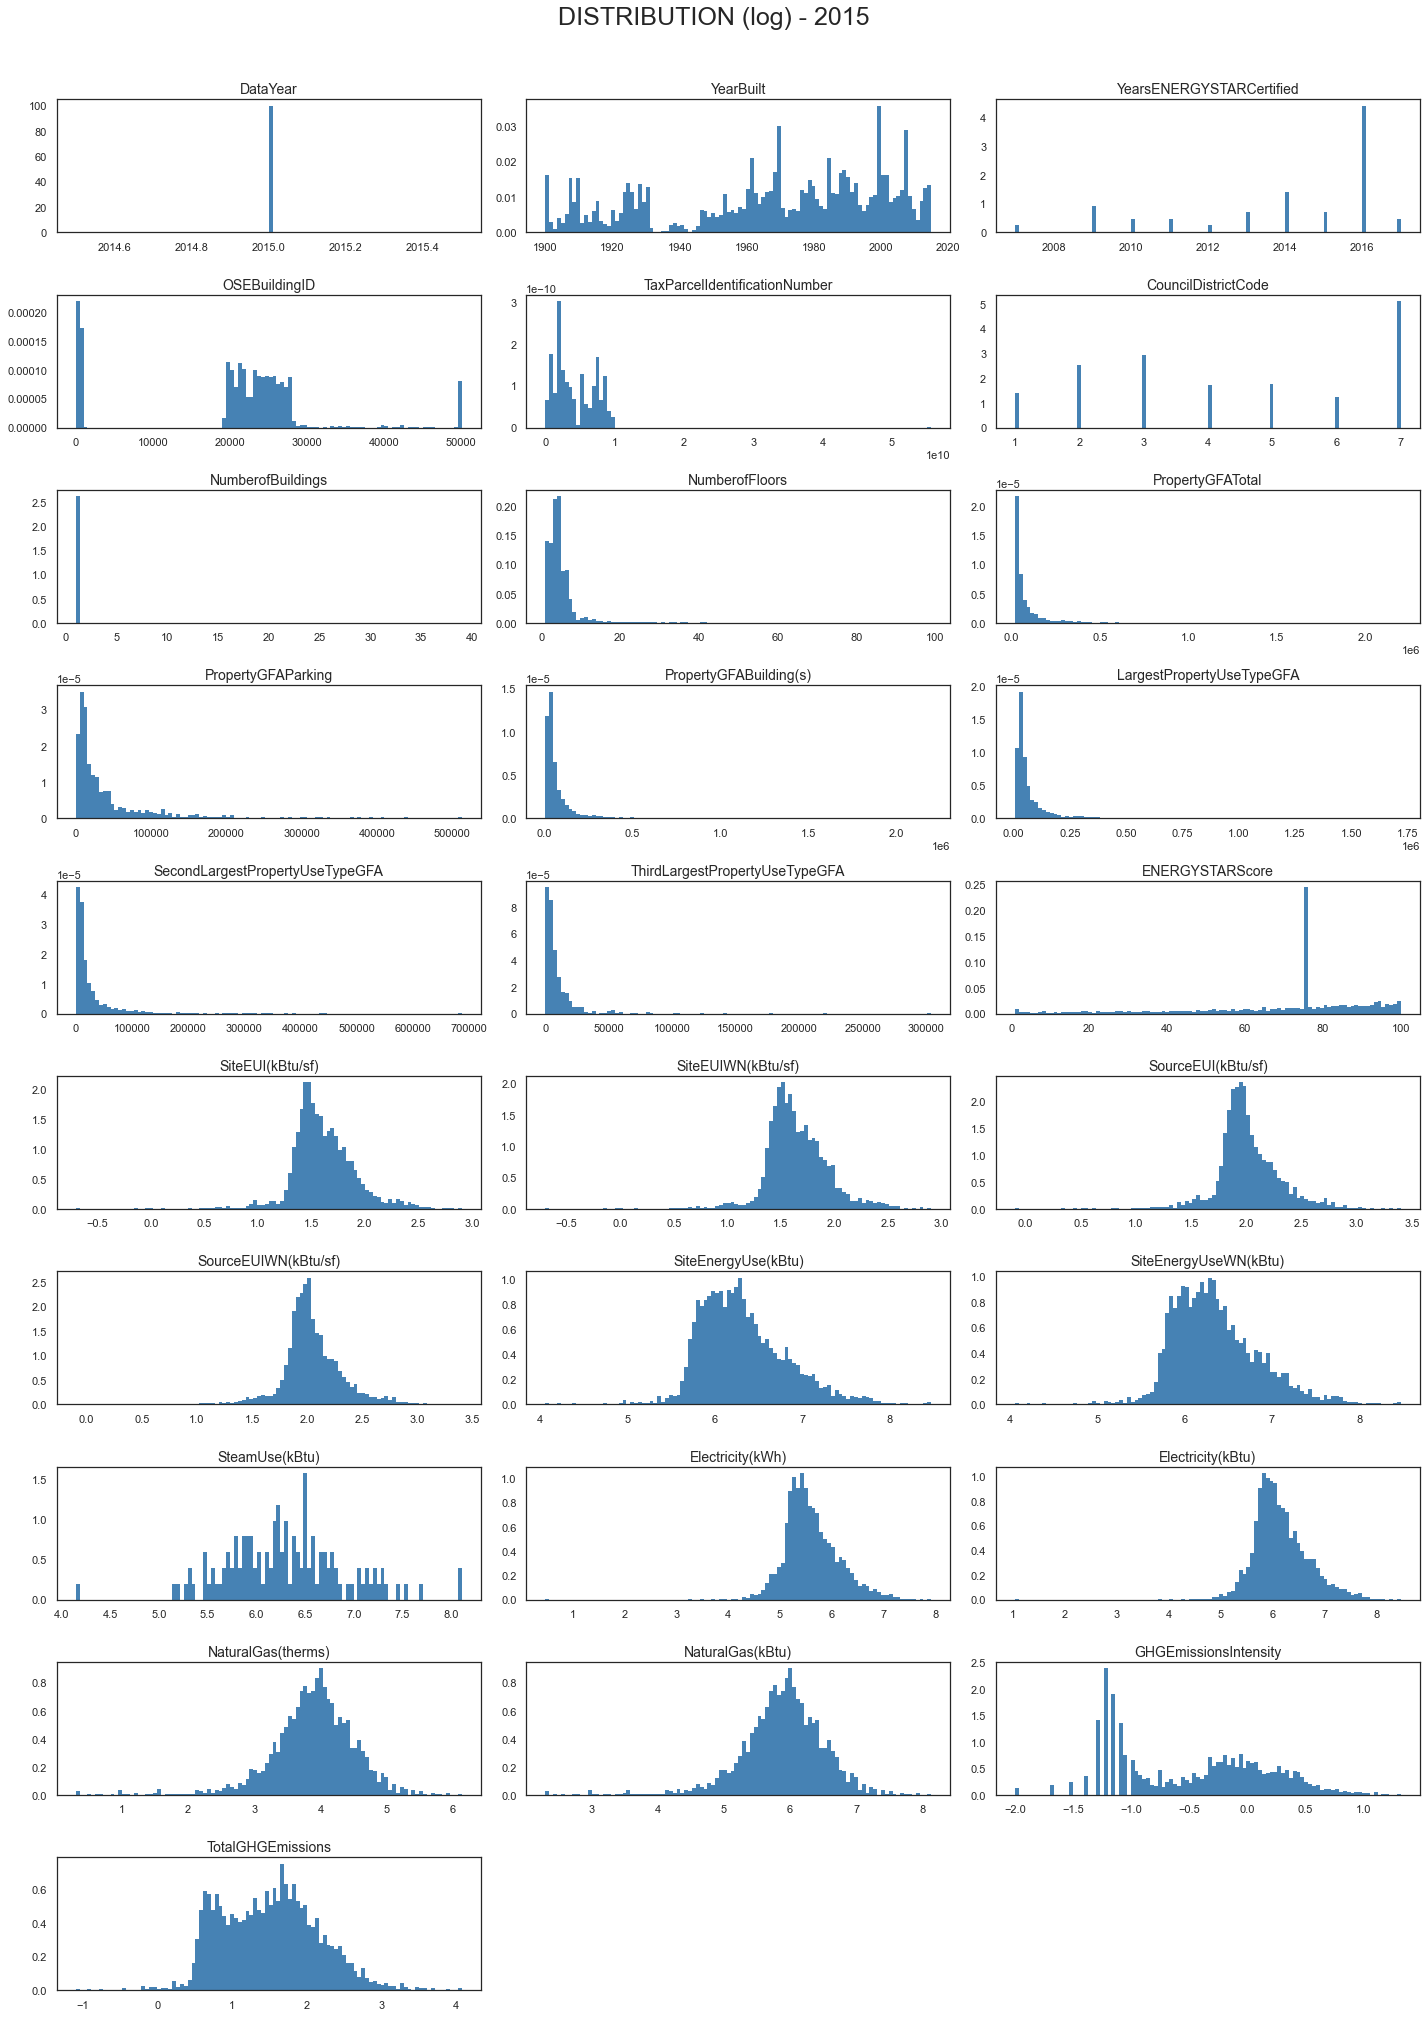

In [160]:
# Plots
fig = plt.figure(figsize=(20,35))
for feat_idx in range(data_02[num_graph_vars].shape[1]):
    sns.set_theme(style="white")
    ax = fig.add_subplot(13,3, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=100, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(data_02[num_graph_vars].columns[feat_idx], fontsize=14)
    
# Figure title:
plt.tight_layout()
fig.suptitle(f"DISTRIBUTION (log) - {year}", fontsize=25, x = 0.5, y = 1.025)

# Save
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\DISTRIBUTION_log_measures_{file}.png", transparent=True)

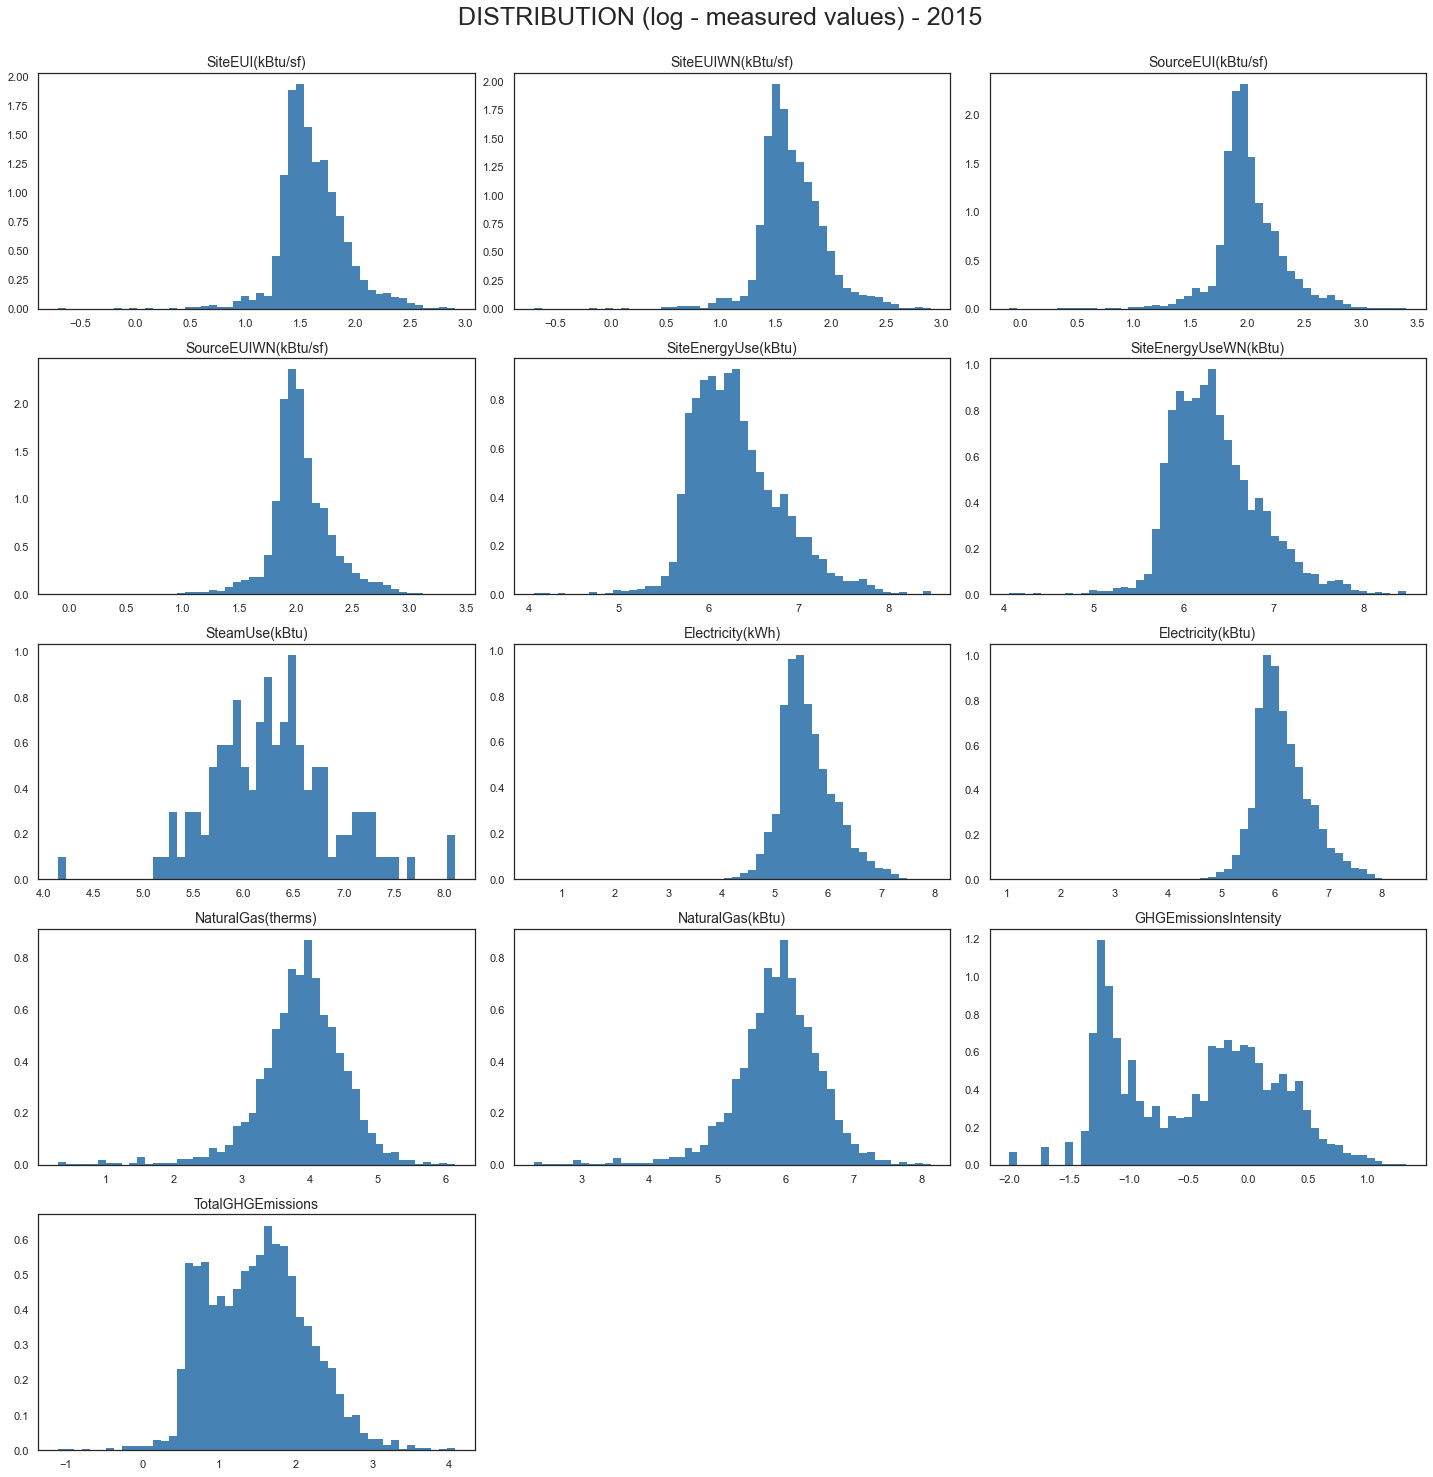

In [161]:
# focus plot on measured values 

# Creation of a dataframe with the the float values only
data_02_float_measured = data_02[float_measures_lst]

# Values
X_02_measured = data_02_float_measured.values

fig = plt.figure(figsize=(20,20))
for feat_idx in range(data_02_float_measured.shape[1]):
    sns.set_theme(style="white")
    ax = fig.add_subplot(5,3, (feat_idx+1))
    h = ax.hist(X_02_measured[:, feat_idx], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(data_02_float_measured.columns[feat_idx], fontsize=14)
    
# Figure ttle:
plt.tight_layout()
fig.suptitle(f"DISTRIBUTION (log - measured values) - {year}", fontsize=25, x = 0.5, y = 1.025)

# Save
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\DISTRIBUTION_log_measured_values_{file}.png", transparent=True)

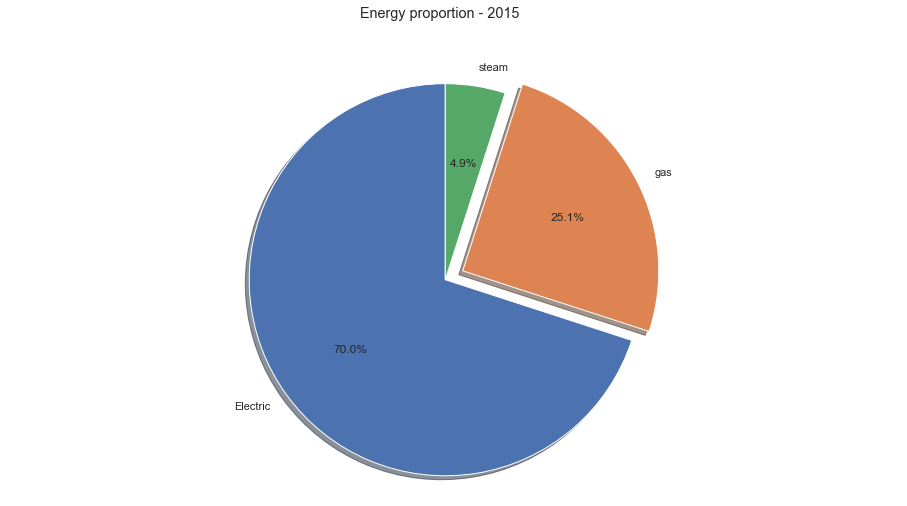

In [162]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Electric','gas','steam']
sizes = energy_total_prop
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(16, 8)
plt.suptitle(f"Energy proportion - {year}")

# Save
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\energy_mix_{file}.png", transparent=True)

## Correlation - numerical variables

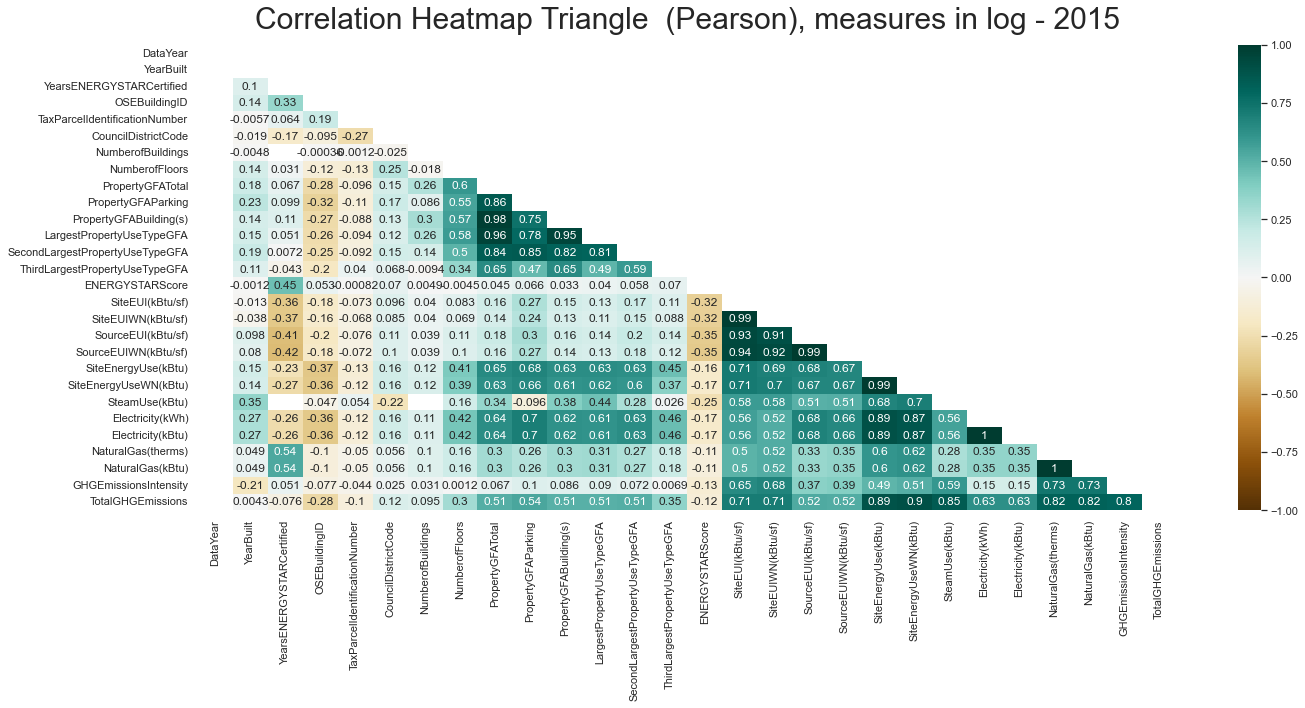

In [163]:
# Heatmap 
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_02[num_graph_vars].corr()))
heatmap = sns.heatmap(data_02[num_graph_vars].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title(f'Correlation Heatmap Triangle  (Pearson), measures in log - {year}', fontdict={'fontsize':30}, pad=16);
plt.tight_layout()

# Figure
fig = heatmap.get_figure()

# Save
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\Heatmap_Pearson_log_float_{file}.png", transparent=True)

Concerning the characteristics:
- 'PropertyGFAParking' is correlated to 'PropertyGFATotal'
- 'PropertyGFABuilding(s)' is correlated to 'PropertyGFATotal'
- 'LargestPropertyUseTypeGFA' is correlated to 'PropertyGFATotal'
    

Concerning the energy consumption:
- 'SiteEnergyUse(kBtu)' is correlated to 'PropertyGFATotal'


Concerning the particule emissions:
- 'GHGEmissions(MetricTonsCO2e)' is correlated to 'SiteEnergyUse(kBtu)'

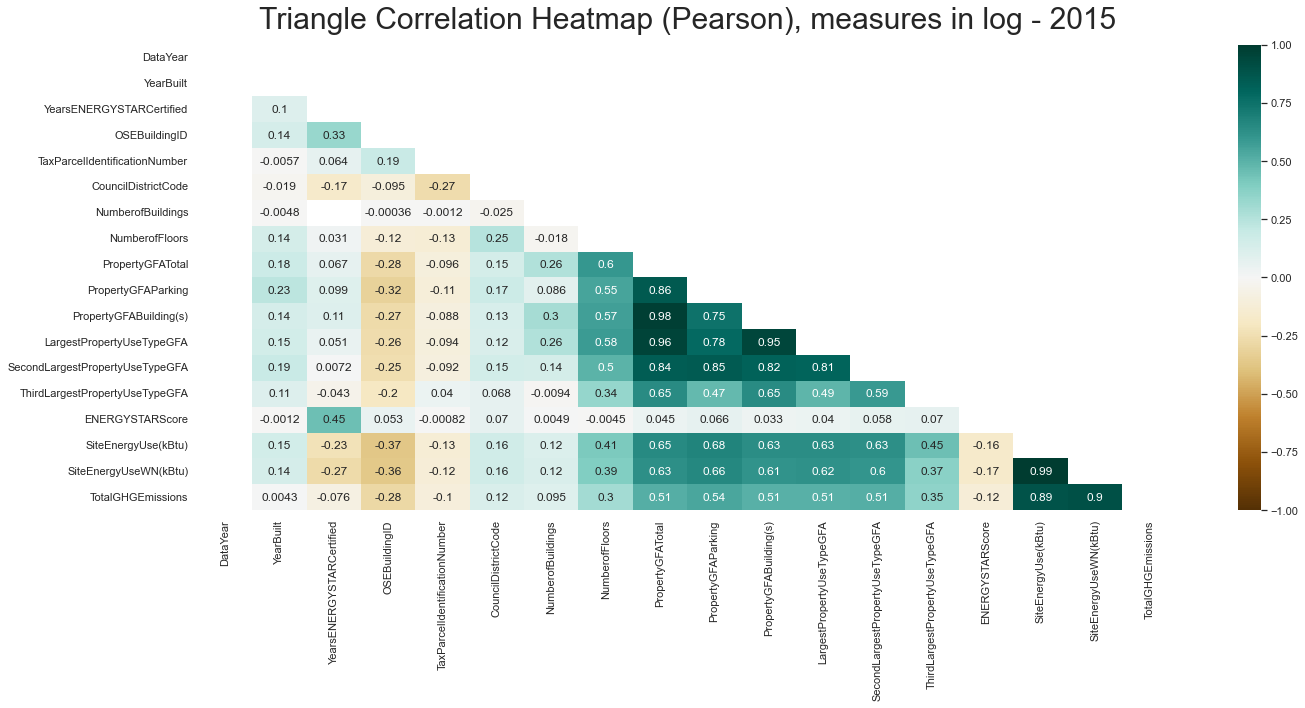

In [164]:
# Plot
# Choice of variables
num_graph_vars_02 = num_graph_vars

num_graph_vars_02 = num_graph_vars_02 + ['SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)','TotalGHGEmissions']

for variable in float_measures_lst:
    if variable in num_graph_vars_02:
        num_graph_vars_02.remove(variable)

# Heatmap 
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_02[num_graph_vars_02].corr()))
heatmap = sns.heatmap(data_02[num_graph_vars_02].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title(f'Triangle Correlation Heatmap (Pearson), measures in log - {year}', fontdict={'fontsize':30}, pad=16);
plt.tight_layout()

fig = heatmap.get_figure()

# Sauvegarde
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\Heatmap_Pearson_log_measures_{file}_02.png", transparent=True)

In [165]:
# Some numerical variables are deleted when the correlation is too high (correlation >0.8):
correlated_features = set()

df = data_02[float_characteristics_lst]

correlation_matrix = df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features

{'LargestPropertyUseTypeGFA',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'SecondLargestPropertyUseTypeGFA'}

'LargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'SecondLargestPropertyUseTypeGFA' can be deleted

## Correlation - categorical variables

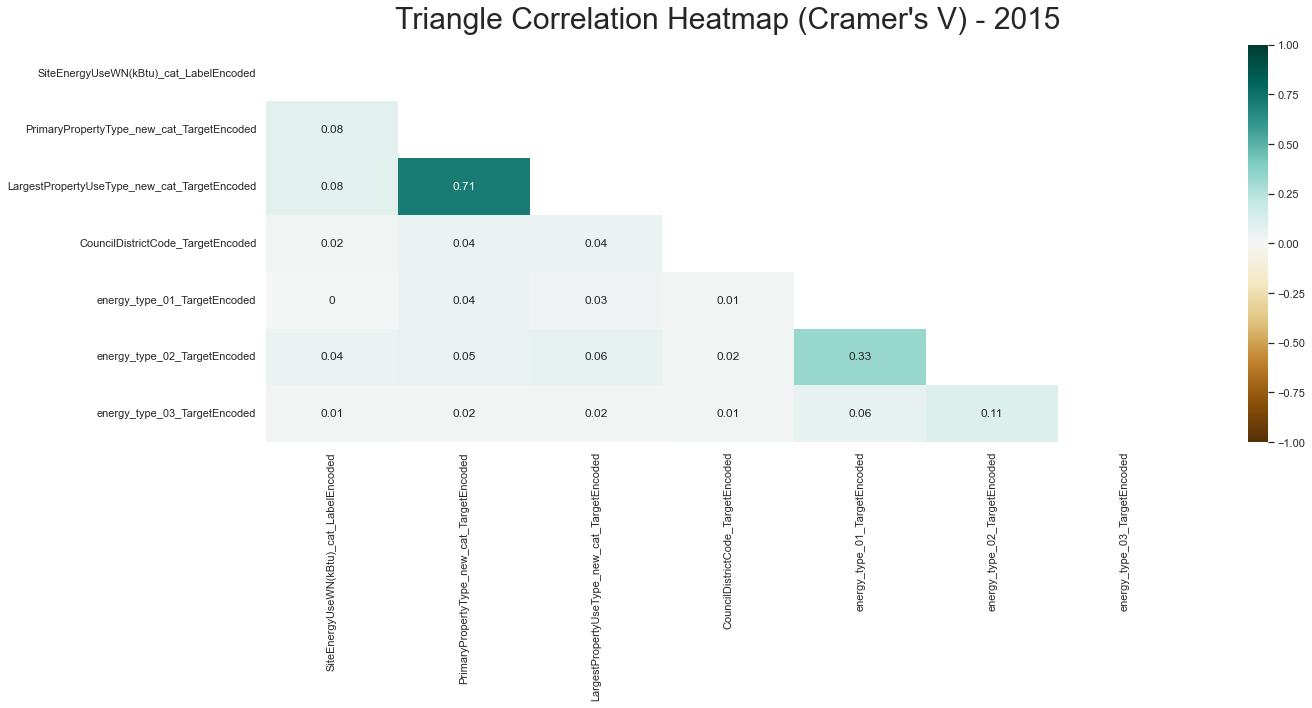

In [166]:
# Heatmap 
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_02_categ_vcramer))
heatmap = sns.heatmap(data_02_categ_vcramer, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title(f"Triangle Correlation Heatmap (Cramer's V) - {year}", fontdict={'fontsize':30}, pad=16);
plt.tight_layout()

# fig
fig = heatmap.get_figure()

# Save
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\Heatmap_vcramer_{file}.png", transparent=True)

'PrimaryPropertyType_TargetEncoded' and 'LargestPropertyUseType_TargetEncoded' are correlated

In [167]:
# Some categorical variables are deleted when the correlation is too high (correlation >0.8):
correlated_features = set()

for i in range(len(data_02_categ_vcramer.columns)):
    for j in range(i):
        if abs(data_02_categ_vcramer.iloc[i, j]) > 0.8:
            colname = data_02_categ_vcramer.columns[i]
            correlated_features.add(colname)
correlated_features

set()

## Bivariate analysis

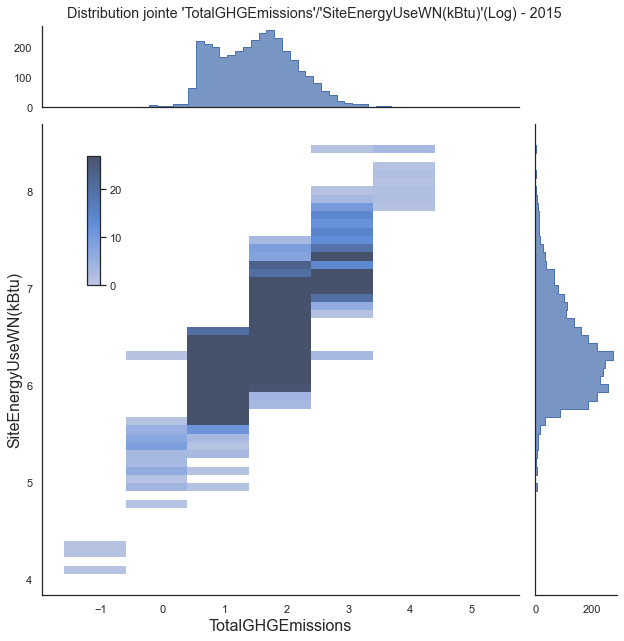

In [168]:
# Plot
g = bi_joint_plot(data_02, 'TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 9, .1)

g.fig.subplots_adjust(top=0.95) # adjust the Figure in rp
g.fig.suptitle(f"Distribution jointe 'TotalGHGEmissions'/'SiteEnergyUseWN(kBtu)'(Log) - {year}")

# Save
file = int(year)
plt.savefig(f"projets\\04_seattle_building_energy\\production\\savefig\\{file}\\jointplot_'TotalGHGEmissions'_'SiteEnergyUseWN(kBtu)'_{file}.png", transparent=True,dpi=300)

## EXPLICATIVE VARIABLES - FILTER

In [169]:
# Variables to delete
caracteristiques_sup = ['LargestPropertyUseTypeGFA','PropertyGFABuilding(s)',
                   'PropertyGFAParking','SecondLargestPropertyUseTypeGFA']

In [170]:
# numerical variable list
numériques_sup = float_measures_lst

# Targets are deleted
numériques_sup.remove('SiteEnergyUse(kBtu)')
numériques_sup.remove('SiteEnergyUseWN(kBtu)') # WN version as well
numériques_sup.remove('TotalGHGEmissions')

In [171]:
# Variables to delete
columns_delete = caracteristiques_sup + numériques_sup

In [172]:
# column droping
data_02.drop(columns_delete, inplace=True, axis=1)

## EXPLICATIVE VARIABLES - FINAL ENCODING - One-Hot Encoding

'PrimaryPropertyType_new_cat', 'LargestPropertyUseType_new_cat', 'Neighborhood' are encoded with hotencoding

### 'PrimaryPropertyType_new_cat'

#### Creation of hierarchical categories

In [173]:
data_02['PrimaryPropertyType_new_cat'].unique()

array(['Hotel/Restaurant', 'Mixed Use Property', 'Commercial centers',
       'Education', 'Office', 'Logistic/Distribution centers',
       'Other/Public places', 'Health services', 'Industry'], dtype=object)

In [174]:
data_02['LargestPropertyUseType_new_cat'].unique()

array(['Hotel/Restaurant', 'Class Missing', 'Commercial centers',
       'Education', 'Office', 'Logistic/Distribution centers', 'Industry',
       'Health services', 'Other/Public places', 'Multifamily Housing'],
      dtype=object)

In [175]:
# The same encoder is used for all the years

# Need to start by 2015
if int(year) == 2015: 
    # creating instance of one-hot-encoder
    enc_xType = OneHotEncoder()

In [176]:
# hierarchical categories
xType_hierarchy = [['Multifamily Housing'],['Office'],['Education'],['Mixed Use Property'],
                   ['Logistic/Distribution centers'],['Commercial centers'],
                   ['Hotel/Restaurant'],['Health services'],['Industry'],
                   ['Other/Public places'],['Class Missing']] 
xType_hierarchy_df = pd.DataFrame(xType_hierarchy)

In [177]:
# fitting
enc_xType.fit(xType_hierarchy_df)

OneHotEncoder()

In [178]:
# encoding
data_02 = vector_encoding_transform_with_merge(data_02, 'PrimaryPropertyType_new_cat', 'OSEBuildingID', enc_xType)

### 'CouncilDistrictCode'

In [179]:
data_02['CouncilDistrictCode'].unique()

array([2, 7, 3, 1, 6, 5, 4], dtype=int64)

In [180]:
# croscheck of the district code with the distric name
pd.crosstab(data['Neighborhood'], data['CouncilDistrictCode'])

CouncilDistrictCode,1,2,3,4,5,6,7
Neighborhood,,,,,,,
BALLARD,0,0,0,0,0,126,0
CENTRAL,0,0,129,0,0,0,0
DELRIDGE,85,0,0,0,0,0,0
DOWNTOWN,0,73,11,0,0,0,464
EAST,0,1,401,0,0,0,31
GREATER DUWAMISH,30,331,3,0,0,0,0
LAKE UNION,0,0,14,96,0,38,96
MAGNOLIA / QUEEN ANNE,0,0,0,0,0,0,408
NORTH,0,0,0,3,184,0,0


In [181]:
# The same encoder is used for all the years

# Need to start by 2015
if int(year) == 2015: 
    # creating instance of one-hot-encoder
    enc_district = OneHotEncoder()

In [182]:
#fitting
enc_district.fit(district_df)

OneHotEncoder()

In [183]:
# encoding
data_02 = vector_encoding_transform_with_merge(data_02, 'CouncilDistrictCode', 'OSEBuildingID', enc_district)

### 'energy_type_03'

In [184]:
data_02['energy_type_03'].unique()

array(['Class Missing', 'gas', 'electricity', 'steam'], dtype=object)

In [185]:
# dataframe of categories
energy_df = pd.DataFrame(['Class Missing', 'electricity','gas','steam'], columns=['energy_type_03'])

# category type
energy_df['energy_type_03'] = energy_df['energy_type_03'].astype('category')

In [186]:
energy_df

,energy_type_03
0,Class Missing
1,electricity
2,gas
3,steam


In [187]:
# The same encoder is used for all the years

# Need to start by 2015
if int(year) == 2015: 
    # creating instance of one-hot-encoder
    enc_energy = OneHotEncoder()

In [188]:
# fitting
enc_energy.fit(energy_df)

OneHotEncoder()

### 'energy_type_02'

In [189]:
# encoding
data_02 = vector_encoding_transform_with_merge(data_02, 'energy_type_02', 'OSEBuildingID', enc_energy)

### 'energy_type_01'

In [190]:
# column filling rate
column_data_rate(data_02)

OSEBuildingID                                                  1.000000
DataYear                                                       1.000000
BuildingType                                                   1.000000
PrimaryPropertyType                                            1.000000
PropertyName                                                   1.000000
TaxParcelIdentificationNumber                                  0.998463
Location                                                       1.000000
CouncilDistrictCode                                            1.000000
Neighborhood                                                   1.000000
YearBuilt                                                      1.000000
NumberofBuildings                                              1.000000
NumberofFloors                                                 1.000000
PropertyGFATotal                                               1.000000
ListOfAllPropertyUseTypes                                      0

# MODIFIED DATASET EXPORT - CSV

Variables that have been categorized, encoded or created:

- 'SiteEnergyUse(kBtu)_cat_LabelEncoded'

- 'PrimaryPropertyType_new_cat_TargetEncoded'
- 'PrimaryPropertyType_new_cat' -> One-hot encoding

- 'LargestPropertyUseType_new_cat_TargetEncoded'

- 'CouncilDistrictCode_TargetEncoded'
- 'CouncilDistrictCode' -> One-hot encoding

- 'energy_type_01' -> Created
- 'energy_type_01_LabelEncoded' 
- 'energy_type_01' -> One-hot encoding

- 'energy_type_02' -> Created
- 'energy_type_01_LabelEncoded'
- 'energy_type_02' -> One-hot encoding

- 'energy_type_03' -> Created
- 'energy_type_01_LabelEncoded'
- 'energy_type_03' -> One-hot encoding



In [191]:
## dataframe saving to csv
file = int(year)

returnValue = data_02.to_csv(f'projets\\04_seattle_building_energy\\production\\data_seattle_building_energy_modified_{file}.csv',sep = ',', index=False)
print(returnValue)

None
